<a href="https://colab.research.google.com/github/GerardoDario/Redes_Neuronales/blob/main/ProyectoFinalProgramacionYoga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"


## Grupo  Nro 25
- Link: https://colab.research.google.com/drive/1Y_jw4KjtSNlGlCl1EnrOq6AT4Y-m02q7#scrollTo=v4KwVyYznuWr
- Github:                                                    
### Nombres:
    * Gema Zumba Acosta
    * Gerardo Sepúlveda Barrera



## Tema: Yoga Posture




### **Enunciado**

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. Los alumnos deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

#### Librerías

In [ ]:
# Importar librerias
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.regularizers import l2

### Conexión a Google Drive

In [ ]:
# Conectamos con nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 0. Funciones básicas

In [ ]:
# directorio de drive donde se encuentran las imágenes
#BASE_FOLDER = "C:/GEMA\OneDrive - Universidad internacional de valencia/VIU/RedesNeuronalesDeepLearning/Deep_Leaning/Programacion/archive"
BASE_FOLDER = "/content/drive/MyDrive/Master IA/Redes Neuronales y Deep Learning/Trabajo grupal/input/"

# listar todas las subcarpetas
def listar_carpetas_imagenes(ruta):
    carpetas = [carpeta for carpeta in os.listdir(ruta) if os.path.isdir(os.path.join(ruta, carpeta))]
    return carpetas

# listar las imágenes que estan dentro de las carpetas
def listar_imagenes_en_carpeta(carpeta):
    carpeta_ruta = os.path.join(BASE_FOLDER, carpeta)
    imagenes = [os.path.join(carpeta_ruta, imagen) for imagen in os.listdir(carpeta_ruta)
                if os.path.isfile(os.path.join(carpeta_ruta, imagen)) and imagen.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]
    return imagenes


In [ ]:
# Obtener sl dataset
def dataset(carpetas):
    X = []
    y = []
    for carpeta in carpetas:
        imagenes_carpeta = listar_imagenes_en_carpeta(carpeta)
        for imagen_path in imagenes_carpeta:
            imagen = cv2.imread(imagen_path)
            if imagen is not None:
                imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
                X.append(imagen)
                y.append(carpeta)
    return X, y


In [ ]:
# Redimensionar las imágenes para tener el mismo tamaño
def redimensionar_imagen(X, new_size):
    images_resized = []
    for img in X:
        resized_img = cv2.resize(img, new_size)
        images_resized.append(resized_img)
    images_resized = np.array(images_resized)

    return images_resized

In [ ]:
# vizualizar la data
def inspeccionar_conjunto_datos(X, y, labelNames, num_imagenes):
    label_map = {label: index for index, label in enumerate(labelNames)}
    fig = plt.figure(figsize=(14, 10))
    for n in range(num_imagenes):
        fig.add_subplot(10, 5, n+1)
        img = X[n]
        plt.imshow(img)
        label_index = label_map[y[n]]
        plt.title(labelNames[label_index])
        plt.axis("off")
        plt.subplots_adjust(hspace=0.5, wspace=0.5)

    plt.show()

In [ ]:
# visualizar la curva de aprendizaje
# def visualize_learning_curve(H):
#    epochs = len(H.history["loss"])
#     plt.style.use("ggplot")  # For example, using the 'ggplot' style
#     plt.figure()
#     plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
#     plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
#     plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
#     plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
#     plt.title("Training Loss and Accuracy")
#     plt.xlabel("Epoch #")
#     plt.ylabel("Loss/Accuracy")
#     plt.legend()
#     plt.show()

# visualizar la curva de aprendizaje
def visualize_learning_curve(H):
    epochs = len(H.history["loss"])
    # Choose a built-in Matplotlib style or provide a valid path to your custom style file
    plt.style.use("ggplot")  # For example, using the 'ggplot' style

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(np.arange(0, epochs), H.history["loss"], label="train_loss", color='purple')
    ax1.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss", color='r')
    ax2.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc", color='b')
    ax2.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc", color='g')
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    #plt.ylabel("Loss/Accuracy")
    ax1.set_ylabel('loss', color='purple')
    ax2.set_ylabel('accuracy', color='blue')
    ax1.legend(loc='upper left', bbox_to_anchor=(1.15, 1),ncol=1, shadow=True)
    ax2.legend(loc='upper left', bbox_to_anchor=(1.15, 0.8),ncol=1, shadow=True)
    # vertical axis limit between 0 and 1
    #ax1.set_ylim(0, 1)
    ax2.set_ylim(0, 1)
    #plt.legend()
    plt.show()

In [ ]:
# función para evaluar el modelo
def evaluate_model(model, x, y):
    print("[INFO]: Evaluando el modelo de predicción...")
    predictions = model.predict(x, batch_size=batch_size)
    y_pred = np.argmax(predictions, axis=1)
    y_true = np.argmax(y, axis=1) if len(y.shape) > 1 else y

    print(classification_report(y_true, y_pred))


In [ ]:
# Matriz de confusión
def plot_confusion_matrix(y_true, y_pred, class_names):
    # Obtener las clases reales y predichas
    y_true_classes = np.argmax(y_true, axis=1) if len(y_true.shape) > 1 else y_true
    y_pred_classes = np.argmax(y_pred, axis=1) if len(y_pred.shape) > 1 else y_pred

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    # Visualizar la matriz de confusión con colores únicos para cada clase de predicción
    plt.figure(figsize=(20, 18))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar=True, square=True)

    plt.xlabel('Clase Predicha')
    plt.ylabel('Clase Real')
    plt.title('Matriz de Confusión')
    plt.show()


In [ ]:
# ver tamaño de la imaagnes
def cargar_imagen(ruta):
    return cv2.imread(ruta)

def listar_tamanio_de_imagen(carpeta):
    tamanios = set()  # Usamos un conjunto para almacenar tamaños únicos
    for carpeta in carpetas:
        imagenes = listar_imagenes_en_carpeta(carpeta)  # Esta función debería devolver una lista de rutas de imágenes
        for imagen in imagenes:
            archivo = cargar_imagen(imagen)
            if archivo is not None:
                alto, ancho, _ = archivo.shape
                tamanio = f"{ancho}x{alto}"
                tamanios.add(tamanio)  # Agregamos el tamaño al conjunto
    return tamanios


In [ ]:
# párametros generales
new_size_CNN_S = (64, 64) # para Scratch
new_size = (224, 224) # para Tuning y Fine Tuning
num_imagenes =50


### 1. Carga del conjunto de datos

In [ ]:
# Llamar a la función listar_carpetas_imagenes y listar_imagenes_en_carpeta
carpetas = listar_carpetas_imagenes(BASE_FOLDER)
cantidad_imagenes = sum(len(listar_imagenes_en_carpeta(carpeta)) for carpeta in carpetas)
print("Cantidad de carpetas: ",len(carpetas))
print("Cantidad total de imágenes en el conjunto de datos:", cantidad_imagenes)

# Llamar a la función para cargar el dataset
X, y = dataset(carpetas)


Cantidad de carpetas:  47
Cantidad total de imágenes en el conjunto de datos: 2759


### 2. Inspección del conjunto de datos

In [ ]:
# Tamaño de las imaganes
tamanio_imagenes = listar_tamanio_de_imagen(carpetas)
print("Tamaños únicos de las imágenes:", tamanio_imagenes)

tamanio_min_alto = np.min([int(t.split('x')[0]) for t in tamanio_imagenes])
tamanio_min_ancho = np.min([int(t.split('x')[1]) for t in tamanio_imagenes])
tamanio_max_alto = np.max([int(t.split('x')[0]) for t in tamanio_imagenes])
tamanio_max_ancho = np.max([int(t.split('x')[1]) for t in tamanio_imagenes])

print(f"Imagen más pequeña: {tamanio_min_alto}x{tamanio_min_ancho}")
print(f"Imagen más grande: {tamanio_max_alto}x{tamanio_max_ancho}")

# Convertir  a lista
tamanio_imagenes_lista = list(tamanio_imagenes)

# Contar cuántas veces aparece el tamaño mínimo y máximo
count_min_size = tamanio_imagenes_lista.count(f"{tamanio_min_alto}x{tamanio_min_ancho}")
print("Cantidad de imágenes pequeñas:", count_min_size)

class_names =  carpetas

Tamaños únicos de las imágenes: {'317x265', '567x460', '473x520', '227x660', '511x228', '712x931', '169x192', '202x503', '788x369', '157x373', '185x284', '336x245', '632x707', '230x219', '267x189', '268x188', '467x292', '533x296', '662x480', '339x300', '305x212', '811x498', '508x351', '124x329', '255x197', '354x314', '561x575', '170x430', '241x282', '418x422', '240x313', '239x171', '438x160', '504x390', '580x342', '249x443', '614x243', '615x339', '429x371', '404x388', '362x340', '189x325', '351x172', '2094x1678', '329x263', '878x635', '531x208', '330x340', '311x162', '309x178', '316x434', '188x508', '189x267', '548x463', '379x401', '507x283', '138x433', '488x308', '333x381', '744x638', '344x228', '525x564', '349x85', '217x408', '503x504', '252x120', '457x172', '369x454', '747x315', '631x285', '377x277', '239x373', '385x487', '228x346', '459x373', '442x475', '246x280', '419x287', '443x157', '450x320', '440x334', '410x258', '408x425', '960x720', '366x202', '742x377', '684x506', '95x122',

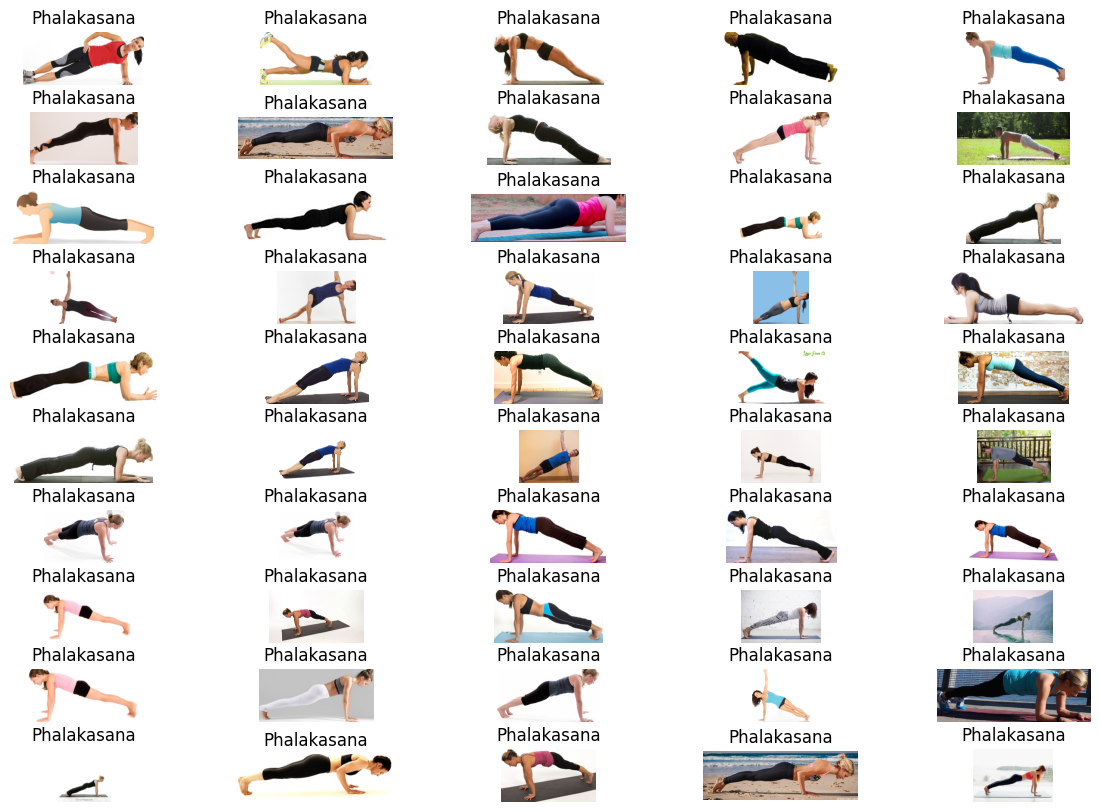

In [ ]:
# Inspección del conjunto de datos
inspeccionar_conjunto_datos(X, y, carpetas,num_imagenes)


### 3. Acondicionamiento del conjunto de datos


In [ ]:
# Convertir listas a matrices numpy
X_resized = redimensionar_imagen(X, new_size) #new_size_CNN_S para Scratch y new_size para transfer learning y fine tuning
X = np.array(X_resized)
y = np.array(y)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización de las imágenes
X_train_norm, X_test_norm = X_train.astype("float32") / 255, X_test.astype("float32") / 255

# División de los datos de entrenamiento en entrenamiento y validación
X_train_tr, X_train_val, y_train_tr, y_train_val = train_test_split(X_train_norm, y_train, test_size=0.15, random_state=42)

# Codificación one-hot para las etiquetas
from sklearn.preprocessing import LabelBinarizer

# Crear un objeto LabelBinarizer y ajustarlo a las clases reales
lb = LabelBinarizer()
y_train_tr_ohe = lb.fit_transform(y_train_tr)
y_train_val_ohe = lb.transform(y_train_val)
y_test_ohe = lb.transform(y_test)

# Imprimir algunas muestras de etiquetas y clases reales

print("Etiquetas codificadas (y_train_tr_ohe):")
print(y_train_tr_ohe[:10])

print("\nClases reales (y_train_tr):")
print(y_train_tr[:10])

# Comparar las clases únicas en las etiquetas y las clases reales
etiquetas_unicas = np.unique(y_train_tr_ohe)
clases_reales_unicas = np.unique(y_train_tr)

print("\nClases únicas en etiquetas codificadas:")
print(etiquetas_unicas)

print("\nClases únicas en clases reales:")
print(clases_reales_unicas)


# Imprimir las formas de los tensores
print("Forma de los datos de entrenamiento de entrada (X_train_tr):", X_train_tr.shape)
print("Forma de los datos de etiquetas de entrenamiento (y_train_tr_ohe):", y_train_tr_ohe.shape)
print("Forma de los datos de validación de entrada (X_train_val):", X_train_val.shape)
print("Forma de los datos de etiquetas de validación (y_train_val_ohe):", y_train_val_ohe.shape)
print("Forma de los datos de test de entrada (X_test):", X_test.shape)
print("Forma de los datos de etiquetas de test (y_test_ohe):", y_test_ohe.shape)

Etiquetas codificadas (y_train_tr_ohe):
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

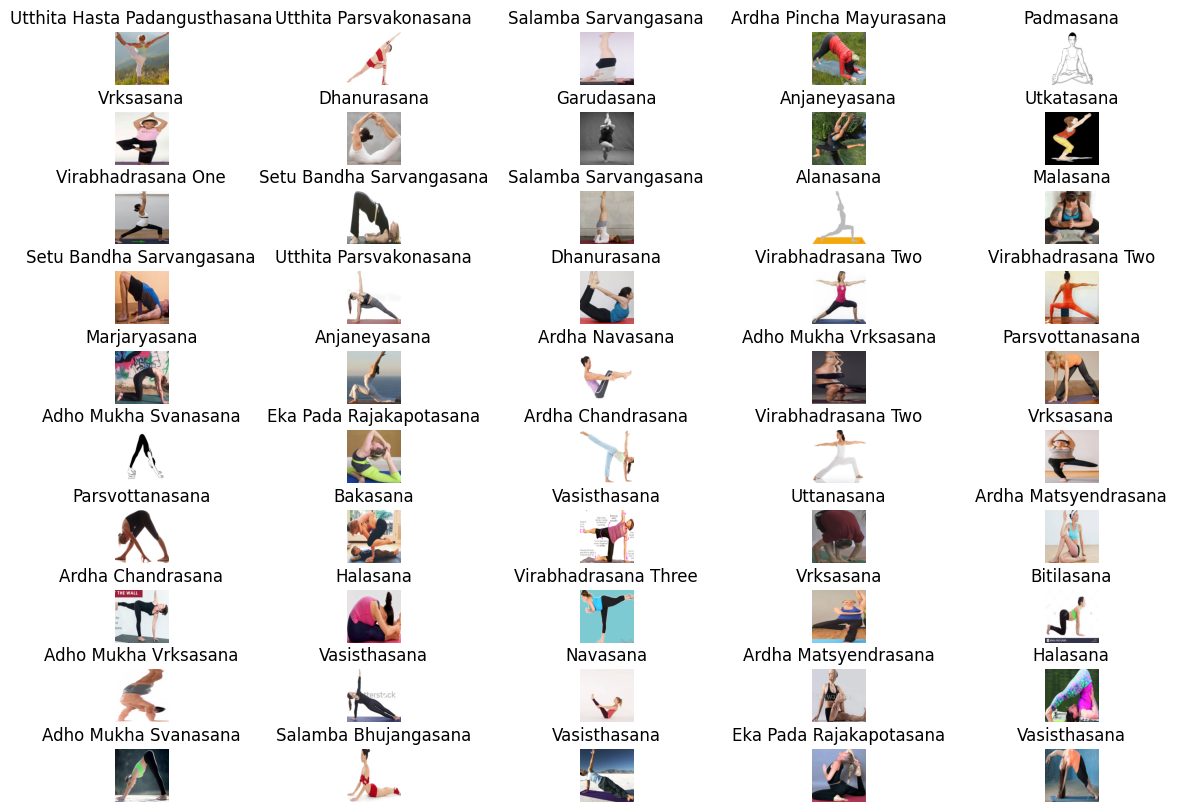

In [ ]:
# Inspección del conjunto de datos de entrenamiento
inspeccionar_conjunto_datos(X_train, y_train, carpetas,num_imagenes)


### 4 Desarrollo de la arquitectura de red neuronal y entrenamiento de la solución

#### 4.1 Estrategia 1: Entrenar desde cero o *from scratch*
La primera estrategia a comparar será una red neuronal profunda que el alumno debe diseñar, entrenar y optimizar. Se debe justificar empíricamente las decisiones que llevaron a la selección de la arquitectura e hiperparámetros final. Se espera que el alumno utilice todas las técnicas de regularización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation, etc.).

In [ ]:
## PARÁMETROS GENERALES
num_clases = len(carpetas)

In [ ]:
# Definición de hiperparámetros
#batch_size = 64
#learning_rate = 0.001
#epochs = 300

# Definición de hiperparámetros 2
#batch_size = 128
#learning_rate = 0.001
#epochs = 300

# Definición de hiperparámetros 3
#batch_size = 64
#learning_rate = 0.01
#epochs = 300

## ============================ Con los parámetros anteriores, se obtuvo una precisión de menos del 40% =======================


#  Definición de hiperparámetros 4
batch_size = 32
learning_rate = 0.0001
epochs = 200

# Callbacks
callback = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)


# Data augmentation
datagen_train = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.25,
                                   height_shift_range=0.25,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=True)

## =============================== Primera arquitectura =============================
# Definición del modelo
input = Input(shape=(X_train_tr.shape[1], X_train_tr.shape[2], X_train_tr.shape[3]))

# Base del modelo
x1 = Conv2D(64, (3,3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(input)
x1 = BatchNormalization()(x1)
x1 = Conv2D(64, (3,3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2,2))(x1)
x1 = Dropout(0.3)(x1)

x2 = Conv2D(128, (3,3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(128, (3,3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2,2))(x2)
x2 = Dropout(0.4)(x2)

x3 = Conv2D(256, (3,3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(x2)
x3 = BatchNormalization()(x3)
x3 = Conv2D(256, (3,3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(x3)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2,2))(x3)
x3 = Dropout(0.5)(x3)

x4 = Conv2D(512, (3,3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(x3)
x4 = BatchNormalization()(x4)
x4 = Conv2D(512, (3,3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(x4)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2,2))(x4)
x4 = Dropout(0.5)(x4)

# Capa de salida
gap = GlobalAveragePooling2D()(x4)
predictions = Dense(num_clases, activation="softmax")(gap)

# Modelo final
model_aug = Model(inputs=input, outputs=predictions)
model_aug.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0     

In [ ]:
## =============================== Segunda arquitectura =============================

# Callbacks
callback = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)

#  Definición de hiperparámetros 5
batch_size = 32
learning_rate = 0.0005
epochs = 150

# Ajuste de Data Augmentation - Modifcado
datagen_train = ImageDataGenerator(rotation_range=25,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   vertical_flip=True)

datagen_val = ImageDataGenerator()

input = Input(shape=(X_train_tr.shape[1], X_train_tr.shape[2], X_train_tr.shape[3]))

x1 = Conv2D(64, (3,3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(input)
x1 = BatchNormalization()(x1)
x1 = Conv2D(64, (3,3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2,2))(x1)
x1 = Dropout(0.4)(x1)

x2 = Conv2D(128, (3,3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(128, (3,3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2,2))(x2)
x2 = Dropout(0.5)(x2)

x3 = Conv2D(256, (3,3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(x2)
x3 = BatchNormalization()(x3)
x3 = Conv2D(256, (3,3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(x3)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2,2))(x3)
x3 = Dropout(0.6)(x3)

x4 = Conv2D(512, (3,3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(x3)
x4 = BatchNormalization()(x4)
x4 = Conv2D(512, (3,3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(x4)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2,2))(x4)
x4 = Dropout(0.6)(x4)

gap = GlobalAveragePooling2D()(x4)
predictions = Dense(num_clases, activation="softmax")(gap)

model_aug2 = Model(inputs=input, outputs=predictions)
model_aug2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization_8 (Bat  (None, 64, 64, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 batch_normalization_9 (Bat  (None, 64, 64, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 64)        0   

In [ ]:
# Compilación del modelo  Definición de hiperparámetros 4 y la primera arquitectura
optimizer = Adam(learning_rate=learning_rate)
model_aug.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])

# Entrenamiento del modelo
H = model_aug.fit(datagen_train.flow(X_train_tr, y_train_tr_ohe, batch_size=batch_size),
                  steps_per_epoch=len(X_train_tr) / batch_size,
                  epochs=epochs,
                  validation_data=datagen_val.flow(X_train_val, y_train_val_ohe, batch_size=batch_size),
                  validation_steps=len(X_train_val) / batch_size,
                  callbacks=[callback])

Epoch 1/150
58/58 [==============================] - 16s 96ms/step - loss: 5.8847 - accuracy: 0.0374 - val_loss: 5.7623 - val_accuracy: 0.0211
Epoch 2/150
58/58 [==============================] - 3s 48ms/step - loss: 5.4362 - accuracy: 0.0534 - val_loss: 6.0821 - val_accuracy: 0.0302
Epoch 3/150
58/58 [==============================] - 3s 48ms/step - loss: 5.2911 - accuracy: 0.0635 - val_loss: 6.3627 - val_accuracy: 0.0393
Epoch 4/150
58/58 [==============================] - 3s 48ms/step - loss: 5.1817 - accuracy: 0.0742 - val_loss: 6.1028 - val_accuracy: 0.0060
Epoch 5/150
58/58 [==============================] - 3s 48ms/step - loss: 5.1000 - accuracy: 0.0848 - val_loss: 6.1358 - val_accuracy: 0.0302
Epoch 6/150
58/58 [==============================] - 3s 48ms/step - loss: 4.9948 - accuracy: 0.1025 - val_loss: 6.2543 - val_accuracy: 0.0091
Epoch 7/150
58/58 [==============================] - 3s 48ms/step - loss: 4.9027 - accuracy: 0.1190 - val_loss: 5.6753 - val_accuracy: 0.0453
Epoch

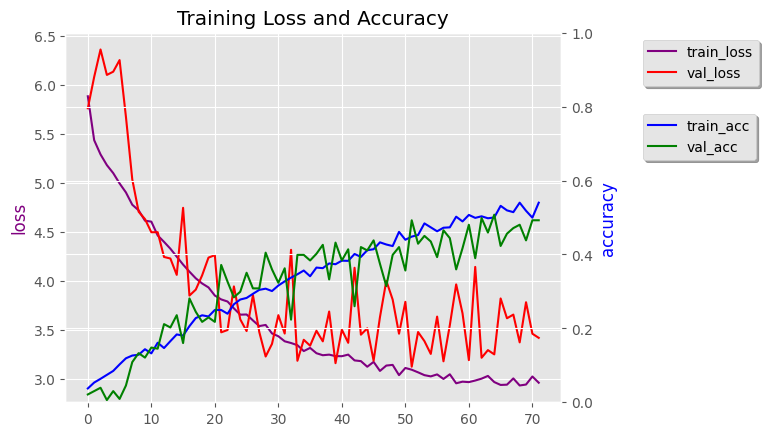

In [ ]:
# visualizar la curva de aprendizaje
visualize_learning_curve(H)

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(model_aug, X_test_norm, y_test_ohe)

[INFO]: Evaluando el modelo de predicción...
18/18 [==============================] - 1s 40ms/step
              precision    recall  f1-score   support

           0       0.50      0.23      0.32        13
           1       0.10      0.08      0.09        12
           2       0.00      0.00      0.00         1
           3       0.36      0.33      0.35        12
           4       0.55      0.75      0.63         8
           5       0.52      0.79      0.62        19
           6       1.00      0.20      0.33         5
           7       0.67      0.44      0.53         9
           8       0.00      0.00      0.00         2
           9       0.35      0.54      0.42        13
          10       0.67      0.67      0.67        18
          11       0.48      0.67      0.56        15
          12       0.83      0.26      0.40        19
          13       1.00      0.25      0.40        12
          14       0.25      0.67      0.36         9
          15       0.54      0.58   

18/18 [==============================] - 0s 9ms/step
Precisión (Accuracy): 50.18%


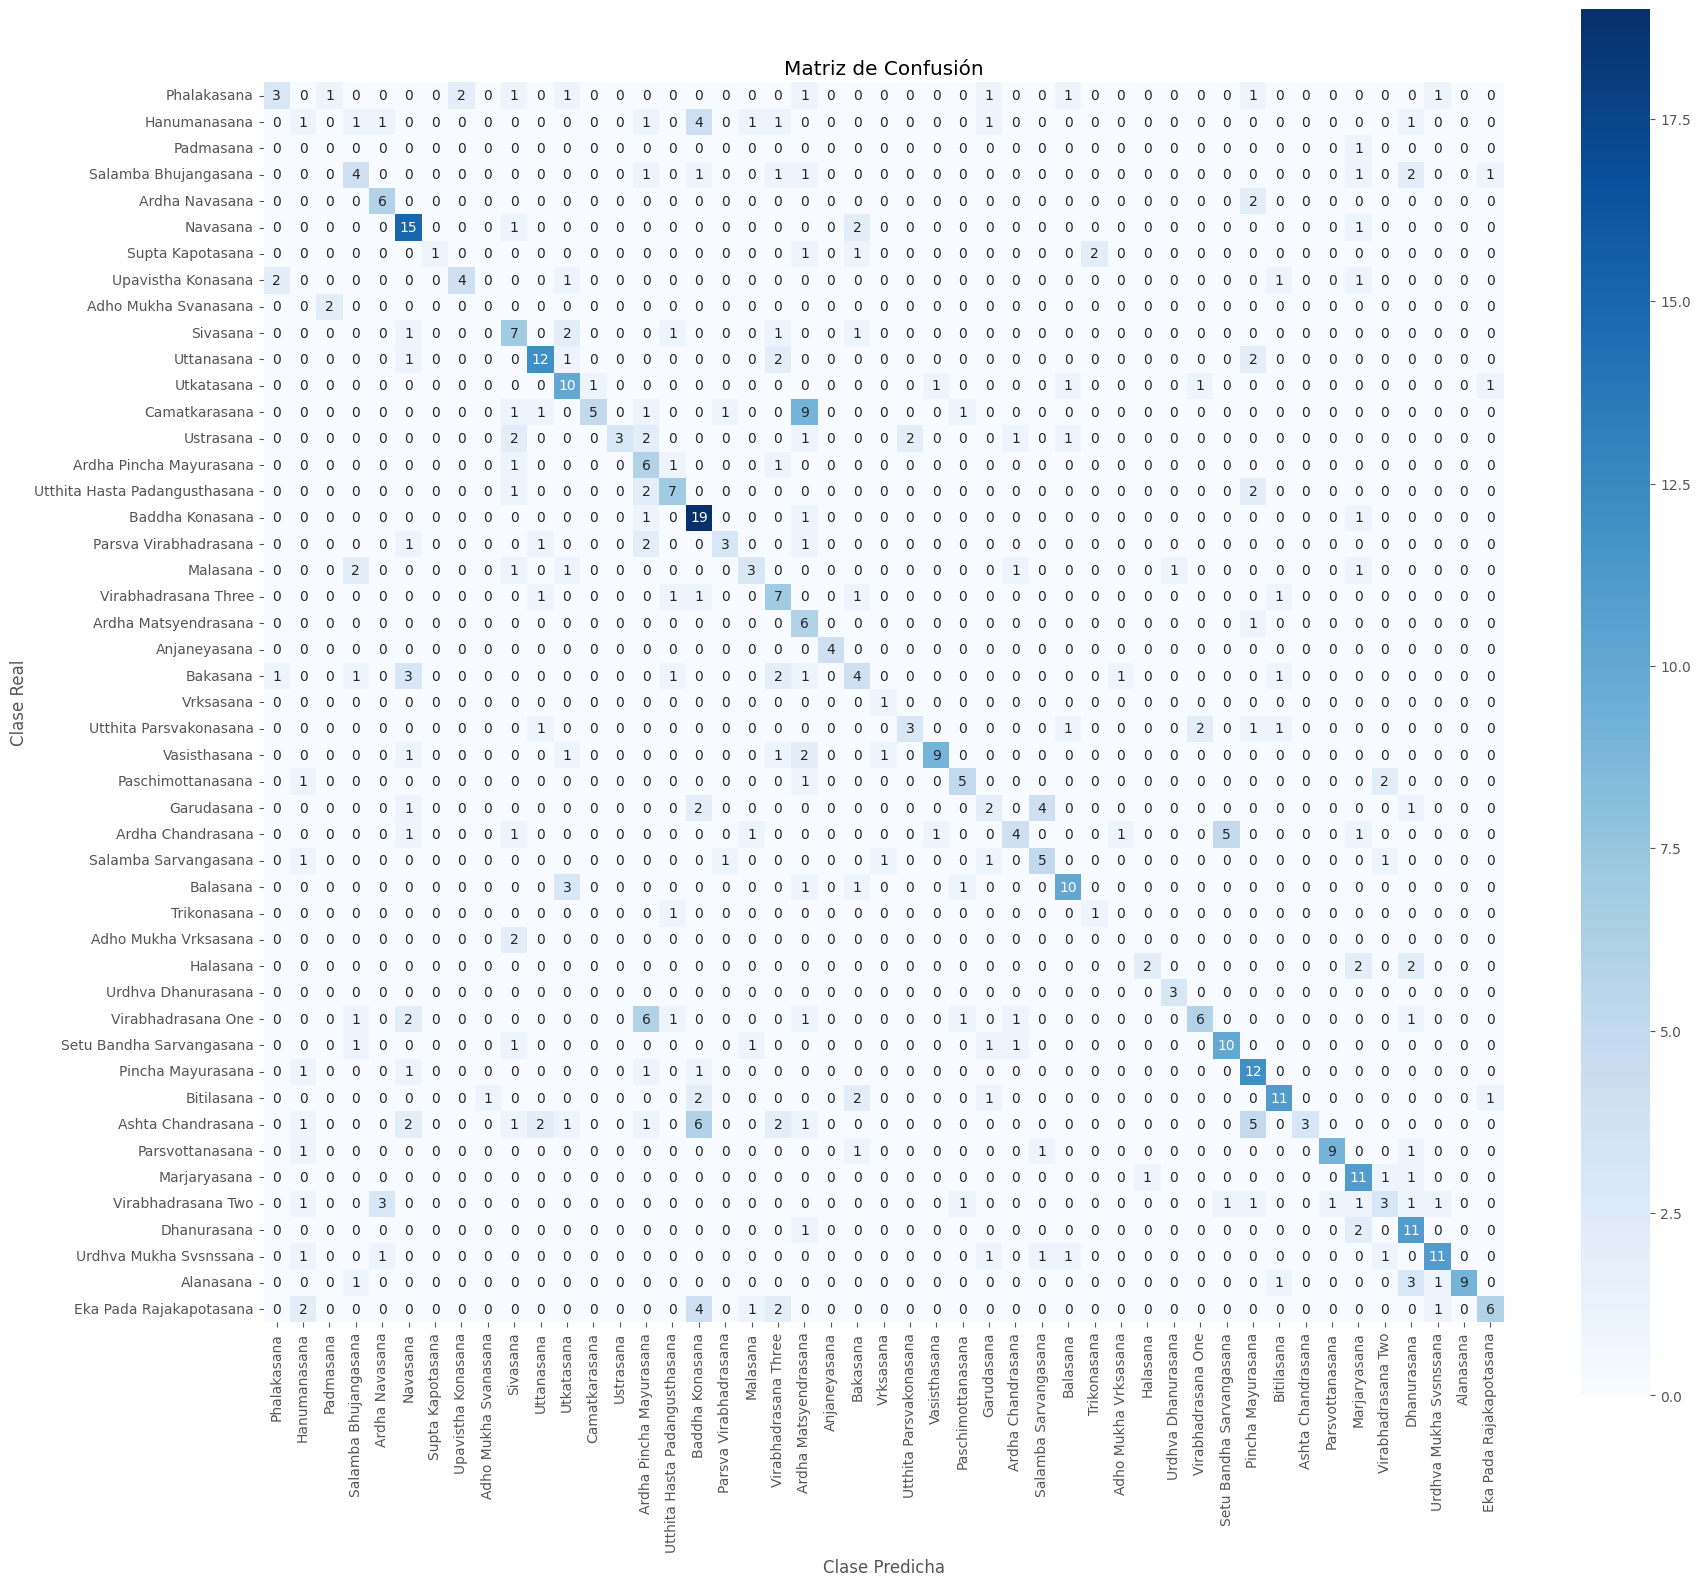

In [ ]:
# Predicir el modelo
y_pred = model_aug.predict(X_test_norm)
# Calcular la precisión (accuracy)
accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test_ohe, axis=1))
print("Precisión (Accuracy): {:.2%}".format(accuracy))

# Obtener las clases reales y predichas
y_true_classes = np.argmax(y_test_ohe, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

plot_confusion_matrix(y_true_classes, y_pred_classes, class_names)

In [ ]:
# Compilación del modelo con   Definición de hiperparámetros 5 y Ajuste de arquitectura del modelo 2
optimizer = Adam(learning_rate=learning_rate)
model_aug2.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])

# Entrenamiento del modelo
H2 = model_aug2.fit(datagen_train.flow(X_train_tr, y_train_tr_ohe, batch_size=batch_size),
                  steps_per_epoch=len(X_train_tr) / batch_size,
                  epochs=epochs,
                  validation_data=datagen_val.flow(X_train_val, y_train_val_ohe, batch_size=batch_size),
                  validation_steps=len(X_train_val) / batch_size,
                  callbacks=[callback])

Epoch 1/150
58/58 [==============================] - 8s 56ms/step - loss: 5.9070 - accuracy: 0.0390 - val_loss: 5.8314 - val_accuracy: 0.0302
Epoch 2/150
58/58 [==============================] - 3s 50ms/step - loss: 5.5802 - accuracy: 0.0326 - val_loss: 6.0787 - val_accuracy: 0.0211
Epoch 3/150
58/58 [==============================] - 3s 50ms/step - loss: 5.4357 - accuracy: 0.0432 - val_loss: 6.5102 - val_accuracy: 0.0272
Epoch 4/150
58/58 [==============================] - 3s 50ms/step - loss: 5.2998 - accuracy: 0.0678 - val_loss: 6.3456 - val_accuracy: 0.0242
Epoch 5/150
58/58 [==============================] - 3s 50ms/step - loss: 5.2354 - accuracy: 0.0763 - val_loss: 6.3968 - val_accuracy: 0.0363
Epoch 6/150
58/58 [==============================] - 3s 50ms/step - loss: 5.1354 - accuracy: 0.0822 - val_loss: 5.8393 - val_accuracy: 0.0272
Epoch 7/150
58/58 [==============================] - 3s 51ms/step - loss: 5.0645 - accuracy: 0.0928 - val_loss: 5.6524 - val_accuracy: 0.0483
Epoch 

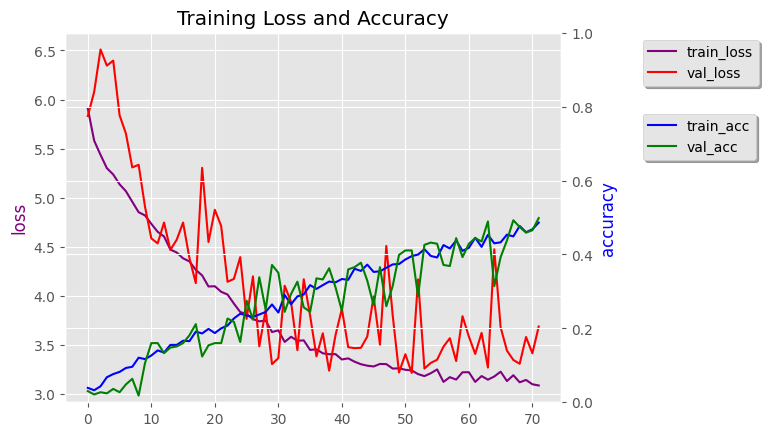

In [ ]:
# visualizar la curva de aprendizaje
visualize_learning_curve(H2)

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(model_aug2, X_test_norm, y_test_ohe)

[INFO]: Evaluando el modelo de predicción...
18/18 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

           0       0.38      0.46      0.41        13
           1       0.00      0.00      0.00        12
           2       0.12      1.00      0.22         1
           3       0.38      0.42      0.40        12
           4       0.80      0.50      0.62         8
           5       0.33      0.68      0.45        19
           6       1.00      0.40      0.57         5
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         2
           9       0.50      0.15      0.24        13
          10       0.35      0.78      0.48        18
          11       0.56      0.33      0.42        15
          12       0.86      0.32      0.46        19
          13       0.70      0.58      0.64        12
          14       0.35      0.67      0.46         9
          15       0.88      0.58    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


18/18 [==============================] - 0s 9ms/step
Precisión (Accuracy): 45.29%


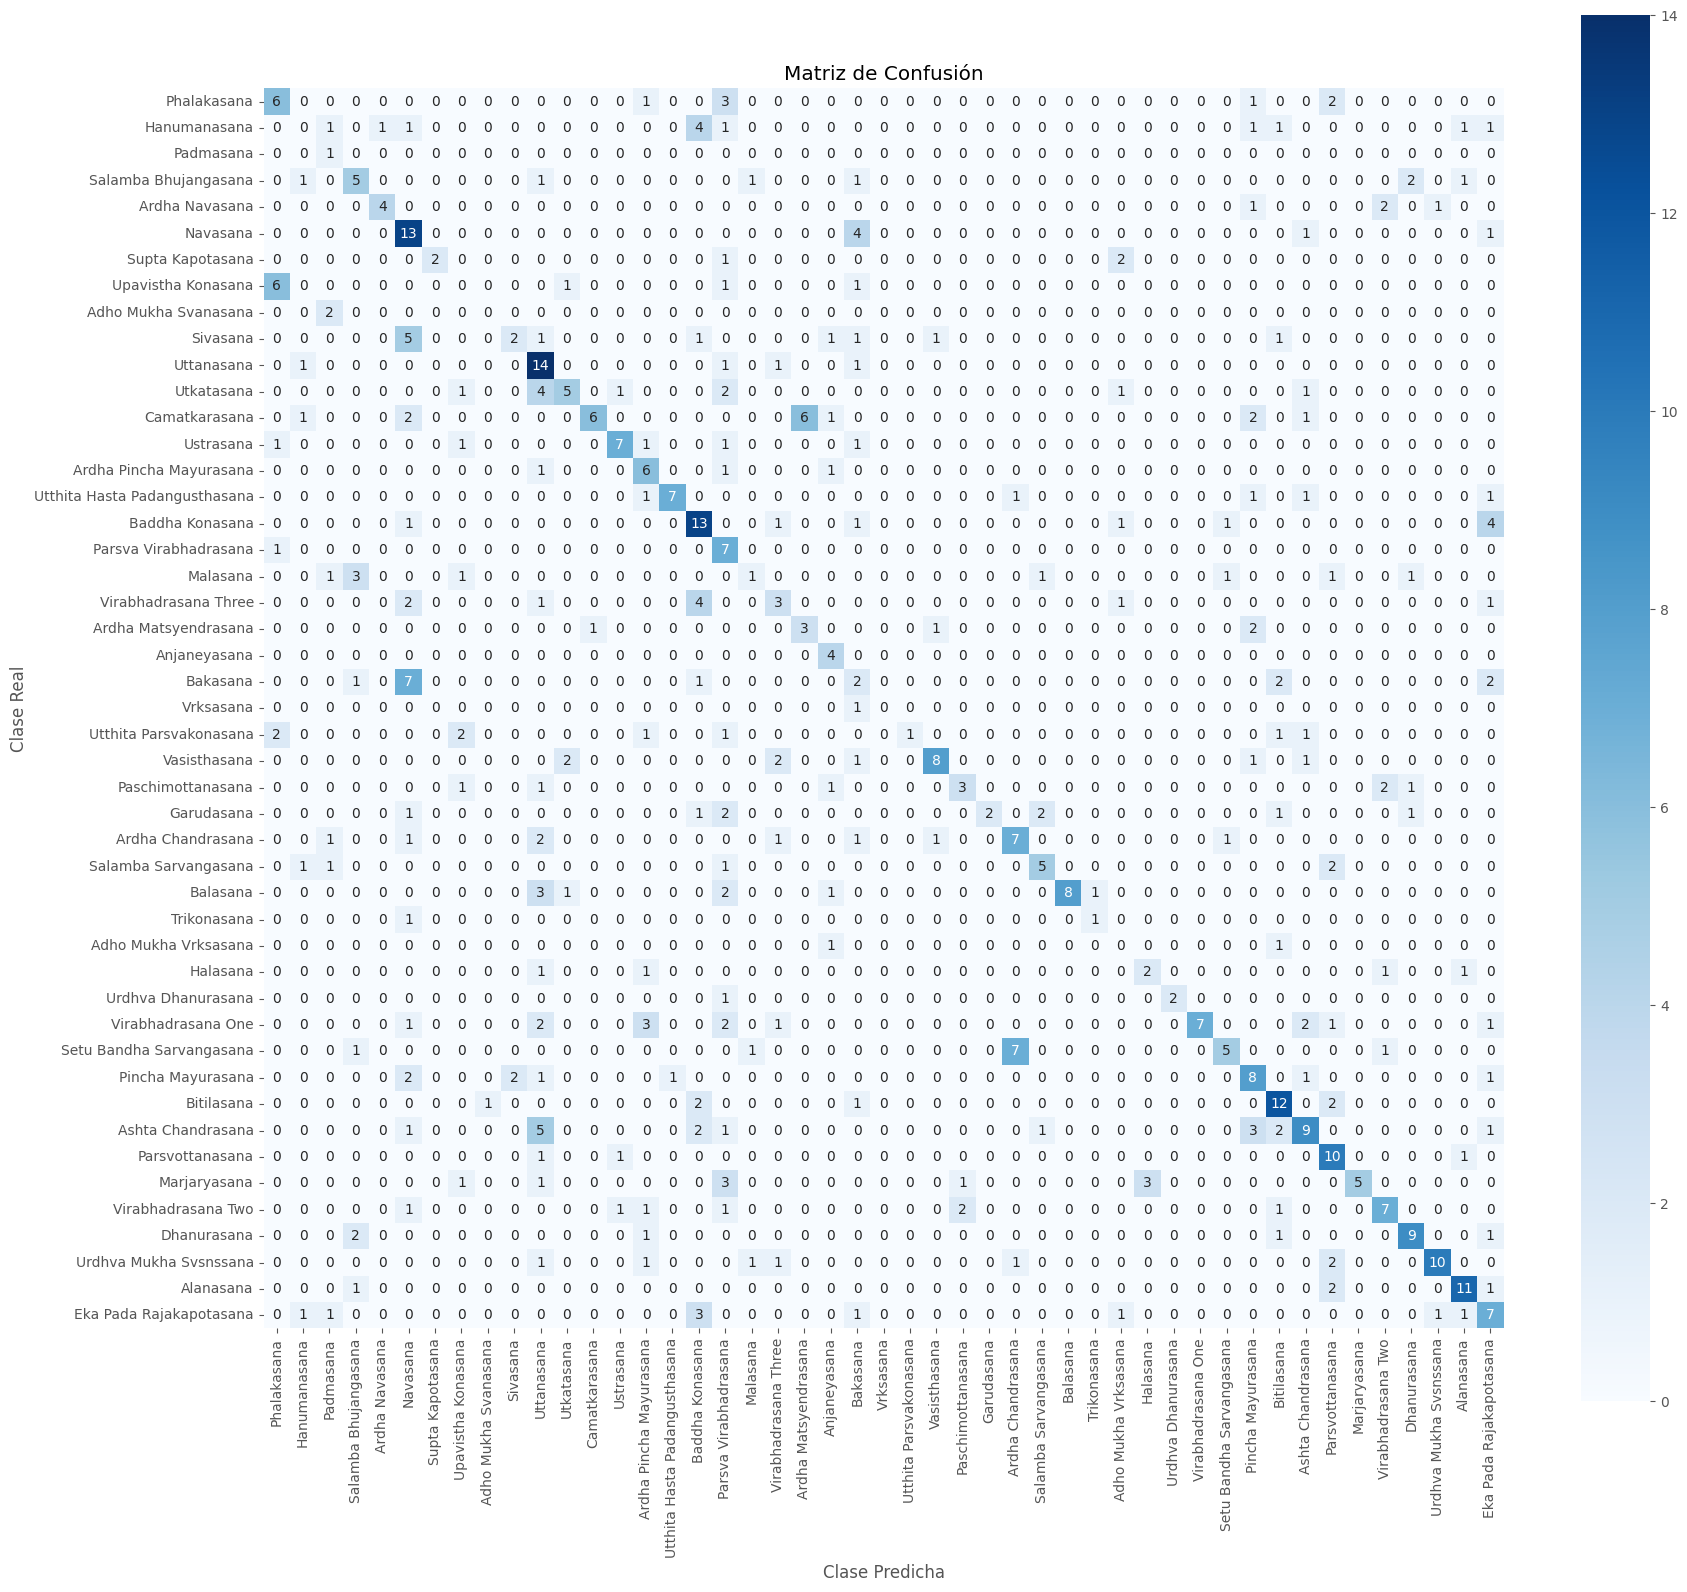

In [ ]:
# Predicir el modelo
y_pred = model_aug2.predict(X_test_norm)
# Calcular la precisión (accuracy)
accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test_ohe, axis=1))
print("Precisión (Accuracy): {:.2%}".format(accuracy))

# Obtener las clases reales y predichas
y_true_classes = np.argmax(y_test_ohe, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

plot_confusion_matrix(y_true_classes, y_pred_classes, class_names)

In [ ]:
# Compilación del modelo sin data_generator
metrica_loss = "categorical_crossentropy"

optimizer = Adam(learning_rate=learning_rate)
model_aug2.compile(optimizer=optimizer, loss=metrica_loss, metrics=['accuracy'])

H3 = model_aug2.fit(X_train_tr, y_train_tr_ohe,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(X_train_val, y_train_val_ohe),
                  callbacks=[callback])

Epoch 1/150
59/59 [==============================] - 7s 56ms/step - loss: 2.2664 - accuracy: 0.6547 - val_loss: 3.7989 - val_accuracy: 0.3625
Epoch 2/150
59/59 [==============================] - 3s 50ms/step - loss: 1.7842 - accuracy: 0.7988 - val_loss: 2.7938 - val_accuracy: 0.5196
Epoch 3/150
59/59 [==============================] - 3s 50ms/step - loss: 1.5510 - accuracy: 0.8538 - val_loss: 2.5592 - val_accuracy: 0.5891
Epoch 4/150
59/59 [==============================] - 3s 50ms/step - loss: 1.4050 - accuracy: 0.8890 - val_loss: 2.5158 - val_accuracy: 0.5891
Epoch 5/150
59/59 [==============================] - 3s 50ms/step - loss: 1.2810 - accuracy: 0.9280 - val_loss: 2.3547 - val_accuracy: 0.6163
Epoch 6/150
59/59 [==============================] - 3s 50ms/step - loss: 1.2303 - accuracy: 0.9344 - val_loss: 2.5647 - val_accuracy: 0.5952
Epoch 7/150
59/59 [==============================] - 3s 50ms/step - loss: 1.1548 - accuracy: 0.9461 - val_loss: 2.3414 - val_accuracy: 0.6314
Epoch 

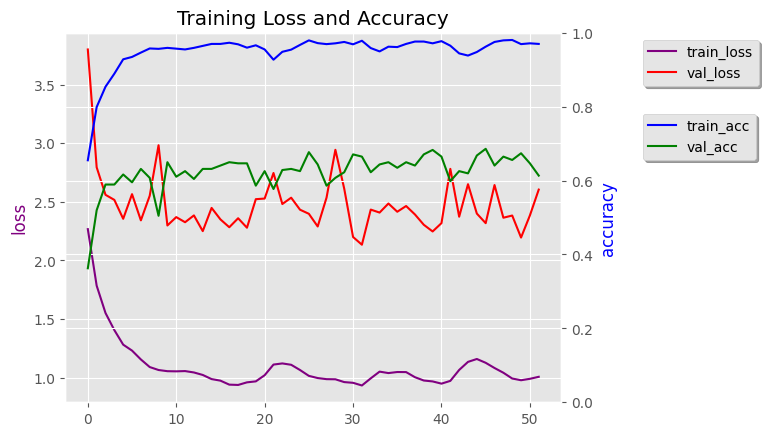

In [ ]:
# visualizar la curva de aprendizaje
visualize_learning_curve(H3)

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(model_aug2, X_test_norm, y_test_ohe)

[INFO]: Evaluando el modelo de predicción...
18/18 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.16      0.25      0.19        12
           2       0.00      0.00      0.00         1
           3       0.64      0.75      0.69        12
           4       0.73      1.00      0.84         8
           5       0.77      0.89      0.83        19
           6       1.00      0.40      0.57         5
           7       0.75      0.67      0.71         9
           8       0.00      0.00      0.00         2
           9       0.56      0.77      0.65        13
          10       0.62      0.83      0.71        18
          11       1.00      0.53      0.70        15
          12       0.92      0.58      0.71        19
          13       0.83      0.83      0.83        12
          14       0.60      0.67      0.63         9
          15       0.64      0.75    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Predicir el modelo
y_pred = model_aug.predict(X_test_norm)

# Calcular la precisión (accuracy)
accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test_ohe, axis=1))
print("Precisión (Accuracy): {:.2%}".format(accuracy))


18/18 [==============================] - 0s 9ms/step
Precisión (Accuracy): 50.18%


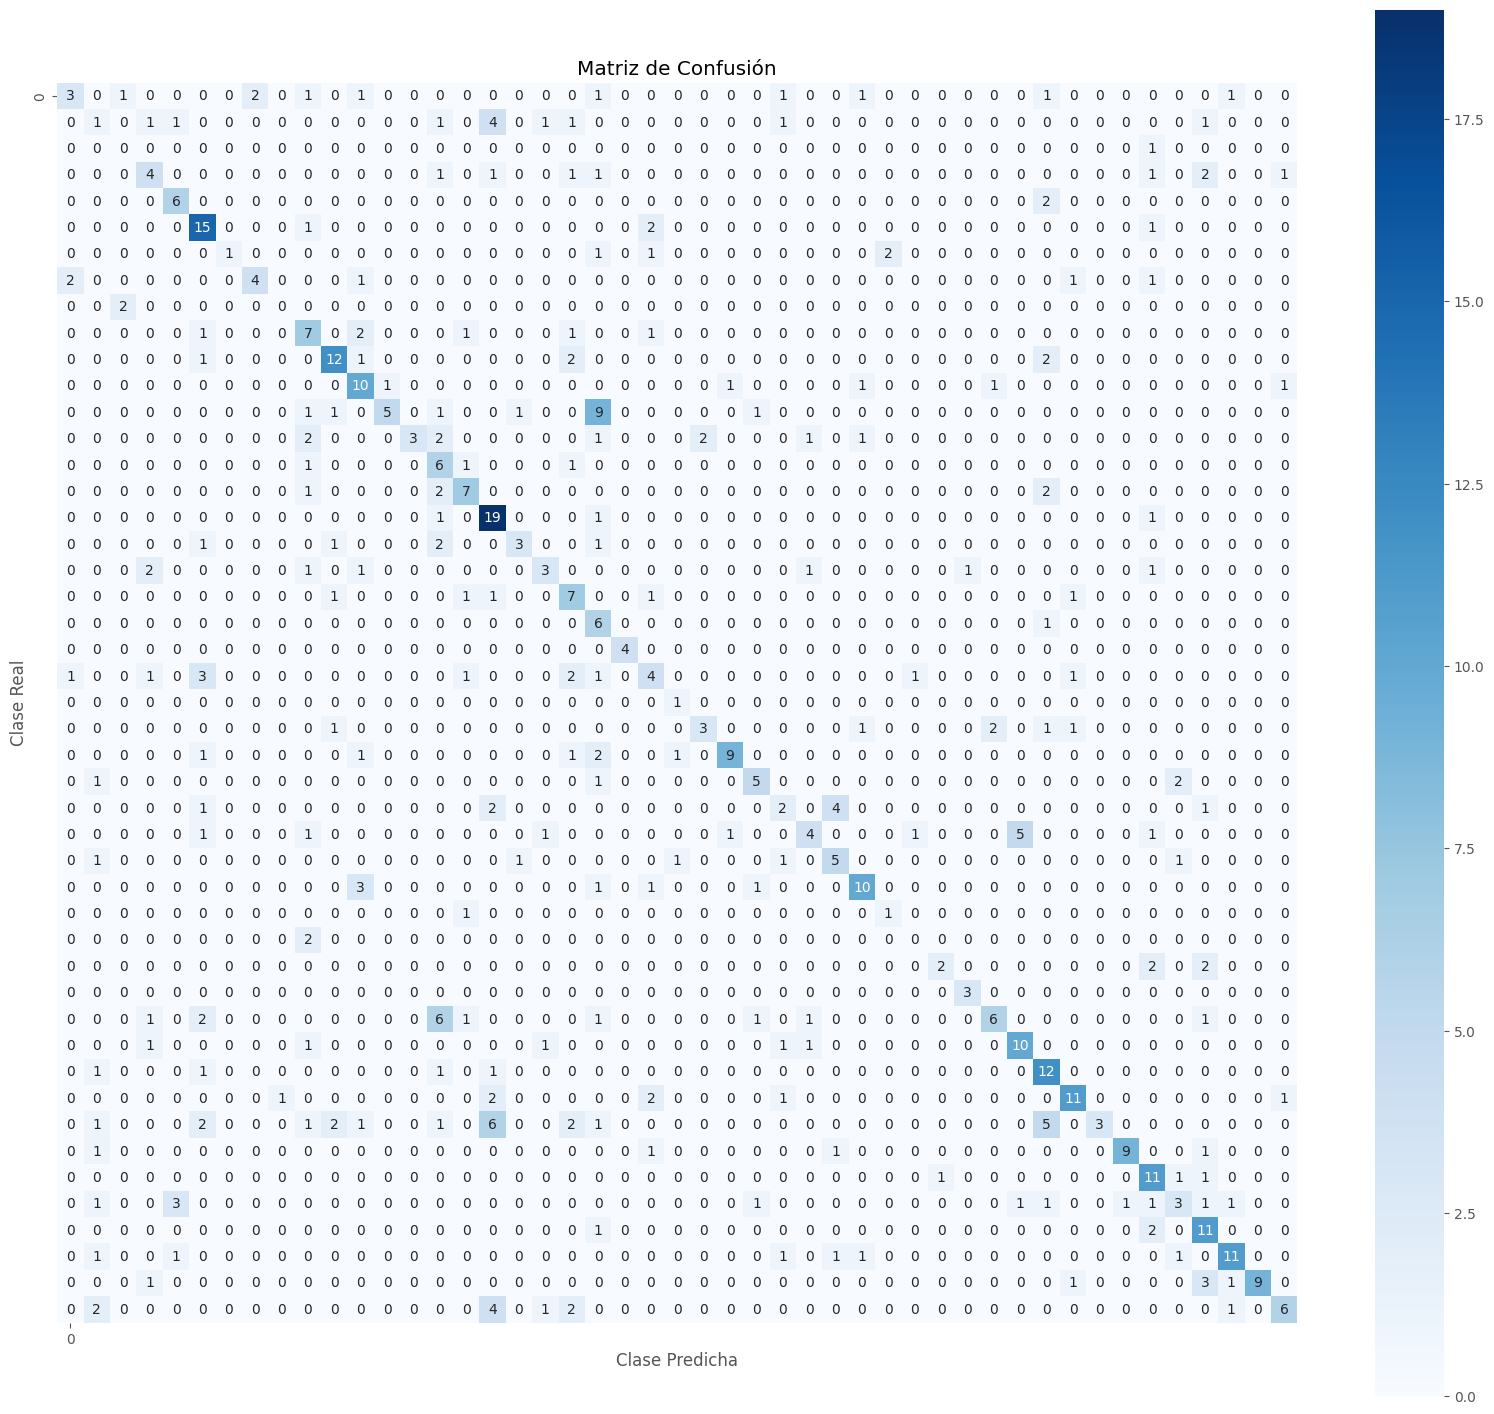

In [ ]:
# Obtener las clases reales y predichas
y_true_classes = np.argmax(y_test_ohe, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

plot_confusion_matrix(y_true_classes, y_pred_classes, num_clases)


#### 4.2 Estrategia 2: Red pre-entrenada
La segunda estrategia a comparar debe incluir la utilización de una red preentrenada con el dataset ImageNet, llevando a cabo tareas de transfer learning y fine-tuning para resolver la tarea de clasificación asignada. Deben compararse al menos dos tipos de arquitecturas (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe seleccionar la que mayor precisión proporcione (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera el uso de todas las técnicas de regularización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation, etc.)

## Cargamos librerías necesarias

In [ ]:
# Desarrollo de la arquitectura de red neuronal pre-entrenada y entrenamiento de la solución
# Importamos librerias necesarias
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.python.keras.layers import Dense, Flatten

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Transfer Learning desde CNN

In [ ]:
# Definición de hiperparámetros
batch_size = 32
learning_rate = 0.0005
epochs = 150
num_clases = len(carpetas)
metrica_loss = "categorical_crossentropy"




# Modelo
transfer_learning_cnn = keras.Sequential()

# Usaremos ResNet152V2
pretrained_model_cnn_resnet = keras.applications.ResNet152V2( # ConvNeXtXLarge 39.49%, ConvNeXtTiny 32%, ResNet152V2 65%, MobileNetV3Large 10%
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(64, 64, 3),
    pooling='max',
    #classes=1000,
    classifier_activation="softmax",
)

# Freeze pretrained ResNet152V2 model
pretrained_model_cnn_resnet.trainable = False

# Callbacks
callback = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)

# Data augmentation
datagen_train = ImageDataGenerator(rotation_range=15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=False)

datagen_val = ImageDataGenerator()

# Agregamos modelo pre entrenado al Top Model
transfer_learning_cnn.add(pretrained_model_cnn_resnet)
transfer_learning_cnn.add(Flatten())
transfer_learning_cnn.add(Dense(num_clases, activation='softmax'))


transfer_learning_cnn.summary()
# Compilación del modelo
transfer_learning_cnn.compile(optimizer=Adam(learning_rate=learning_rate),loss=metrica_loss,metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 2048)              58331648  
                                                                 
 module_wrapper_1 (ModuleWr  (None, 2048)              0         
 apper)                                                          
                                                                 
 dense_3 (Dense)             (None, 47)                96303     
                                                                 
Total params: 58427951 (222.88 MB)
Trainable params: 96303 (376.18 KB)
Non-trainable params: 58331648 (222.52 MB)
_________________________________________________________________


In [ ]:
# Entrenamiento del modelo ResNet152V2_model
H_transfer_learning_cnn= transfer_learning_cnn.fit(datagen_train.flow(X_train_tr, y_train_tr_ohe, batch_size=batch_size),
                  epochs=epochs,
                  steps_per_epoch=X_train_tr.shape[0] // batch_size,
                  validation_data=datagen_val.flow(X_train_val, y_train_val_ohe, batch_size=batch_size),
                  callbacks=[callback])

Epoch 1/150
58/58 [==============================] - 14s 100ms/step - loss: 4.7581 - accuracy: 0.0472 - val_loss: 3.9751 - val_accuracy: 0.1148
Epoch 2/150
58/58 [==============================] - 3s 50ms/step - loss: 3.6778 - accuracy: 0.1341 - val_loss: 3.3728 - val_accuracy: 0.2115
Epoch 3/150
58/58 [==============================] - 3s 49ms/step - loss: 3.2306 - accuracy: 0.1998 - val_loss: 3.0160 - val_accuracy: 0.2810
Epoch 4/150
58/58 [==============================] - 3s 52ms/step - loss: 2.9553 - accuracy: 0.2476 - val_loss: 2.8801 - val_accuracy: 0.3112
Epoch 5/150
58/58 [==============================] - 3s 51ms/step - loss: 2.6965 - accuracy: 0.3062 - val_loss: 2.7338 - val_accuracy: 0.3293
Epoch 6/150
58/58 [==============================] - 3s 49ms/step - loss: 2.6645 - accuracy: 0.2975 - val_loss: 2.6582 - val_accuracy: 0.3535
Epoch 7/150
58/58 [==============================] - 3s 51ms/step - loss: 2.4706 - accuracy: 0.3594 - val_loss: 2.6126 - val_accuracy: 0.3807
Epoc

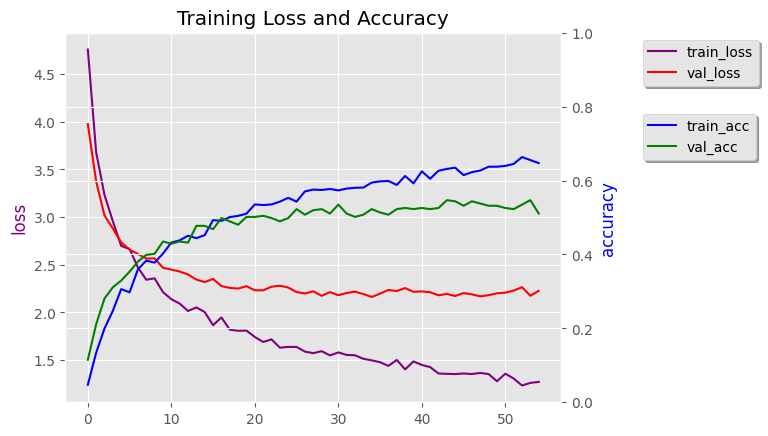

In [ ]:
# visualizar la curva de aprendizaje
visualize_learning_curve(H_transfer_learning_cnn)

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(transfer_learning_cnn, X_test_norm, y_test_ohe)

[INFO]: Evaluando el modelo de predicción...
18/18 [==============================] - 4s 85ms/step
              precision    recall  f1-score   support

           0       0.35      0.46      0.40        13
           1       0.00      0.00      0.00        12
           2       0.14      1.00      0.25         1
           3       0.22      0.17      0.19        12
           4       0.50      0.62      0.56         8
           5       0.60      0.63      0.62        19
           6       1.00      0.20      0.33         5
           7       0.55      0.67      0.60         9
           8       0.00      0.00      0.00         2
           9       0.44      0.31      0.36        13
          10       0.56      0.50      0.53        18
          11       0.53      0.53      0.53        15
          12       0.53      0.42      0.47        19
          13       0.37      0.58      0.45        12
          14       0.50      0.89      0.64         9
          15       0.55      0.50   

In [ ]:
# Predicir el modelo
y_pred = transfer_learning_cnn.predict(X_test_norm)

# Calcular la precisión (accuracy)
accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test_ohe, axis=1))
print("Precisión (Accuracy): {:.2%}".format(accuracy))

18/18 [==============================] - 1s 31ms/step
Precisión (Accuracy): 50.91%


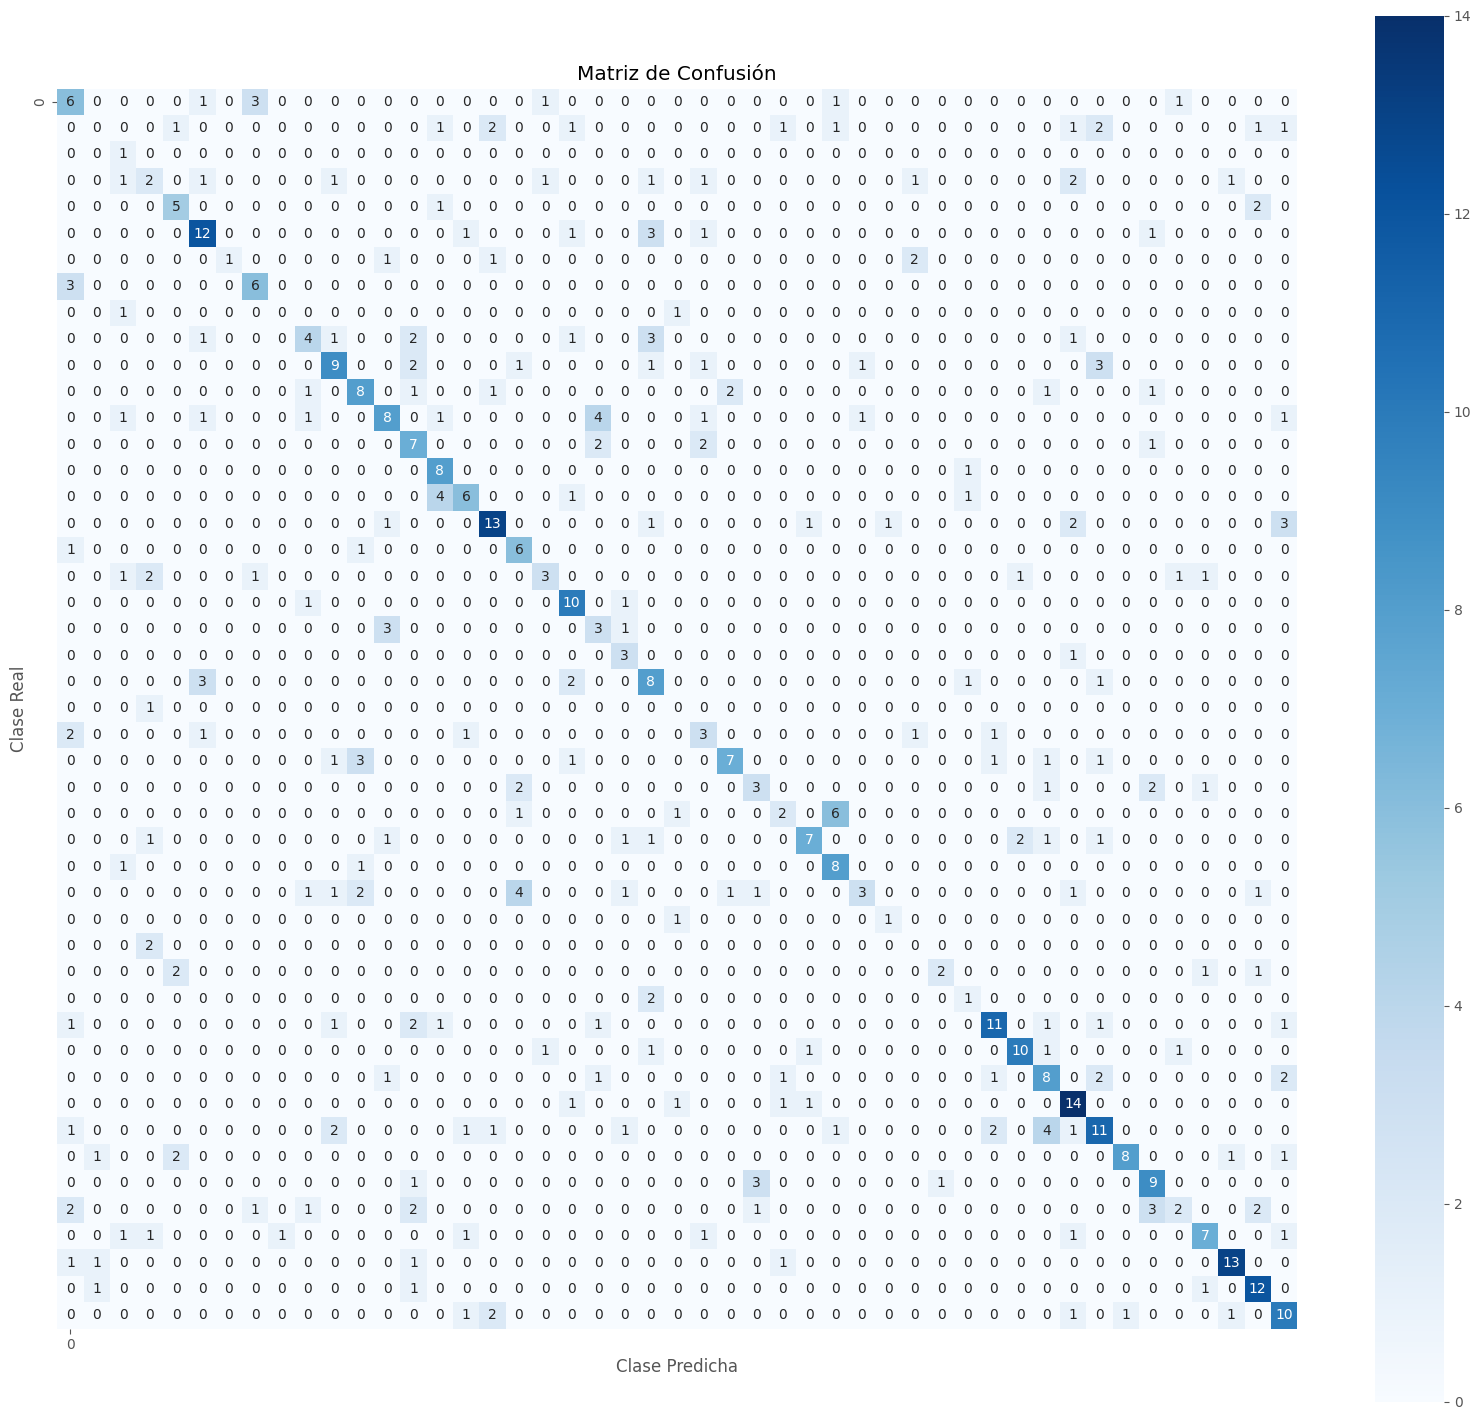

In [ ]:
# Obtener las clases reales y predichas
y_true_classes = np.argmax(y_test_ohe, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

plot_confusion_matrix(y_true_classes, y_pred_classes, num_clases)

## Fine Tuning CNN ResNet

In [ ]:
# Copiamos el modelo y dejamos la copia como entrenable
model_fine_tuning_cnn = transfer_learning_cnn
model_fine_tuning_cnn.trainable = True

In [ ]:
# Vemos cuantas capas existen en el base model
print("Number of layers in the base model: ", len(model_fine_tuning_cnn.layers))

# Fine-tune desde la capa definida a continuacion
fine_tune_at = 0

# Freeze a las capas antes de `fine_tune_at`, si es cero, hacemos tuning sobre todas las capas
for layer in model_fine_tuning_cnn.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  3


In [ ]:
# Compilación del modelo
model_fine_tuning_cnn.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss="categorical_crossentropy", metrics=["accuracy"]
    )

model_fine_tuning_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 2048)              58331648  
                                                                 
 module_wrapper_1 (ModuleWr  (None, 2048)              0         
 apper)                                                          
                                                                 
 dense_3 (Dense)             (None, 47)                96303     
                                                                 
Total params: 58427951 (222.88 MB)
Trainable params: 58284207 (222.34 MB)
Non-trainable params: 143744 (561.50 KB)
_________________________________________________________________


In [ ]:
# Entrenamiento de las capas del modelo pre entrenado
history_fine_cnn = model_fine_tuning_cnn.fit(datagen_train.flow(X_train_tr, y_train_tr_ohe, batch_size=batch_size),
                  epochs=epochs,
                  steps_per_epoch=X_train_tr.shape[0] // batch_size,
                  validation_data=datagen_val.flow(X_train_val, y_train_val_ohe, batch_size=batch_size),
                  callbacks=[callback])

Epoch 1/150
58/58 [==============================] - 89s 216ms/step - loss: 6.2211 - accuracy: 0.0966 - val_loss: 2.9141 - val_accuracy: 0.3595
Epoch 2/150
58/58 [==============================] - 8s 142ms/step - loss: 5.6661 - accuracy: 0.1211 - val_loss: 3.8548 - val_accuracy: 0.2628
Epoch 3/150
58/58 [==============================] - 8s 141ms/step - loss: 5.2075 - accuracy: 0.1238 - val_loss: 4.2660 - val_accuracy: 0.2054
Epoch 4/150
58/58 [==============================] - 8s 140ms/step - loss: 4.9678 - accuracy: 0.1433 - val_loss: 4.7651 - val_accuracy: 0.2054
Epoch 5/150
58/58 [==============================] - 8s 139ms/step - loss: 4.5360 - accuracy: 0.1688 - val_loss: 5.0479 - val_accuracy: 0.1994
Epoch 6/150
58/58 [==============================] - 8s 138ms/step - loss: 4.2558 - accuracy: 0.1938 - val_loss: 5.0106 - val_accuracy: 0.2205
Epoch 7/150
58/58 [==============================] - 8s 137ms/step - loss: 3.9776 - accuracy: 0.1971 - val_loss: 5.0296 - val_accuracy: 0.232

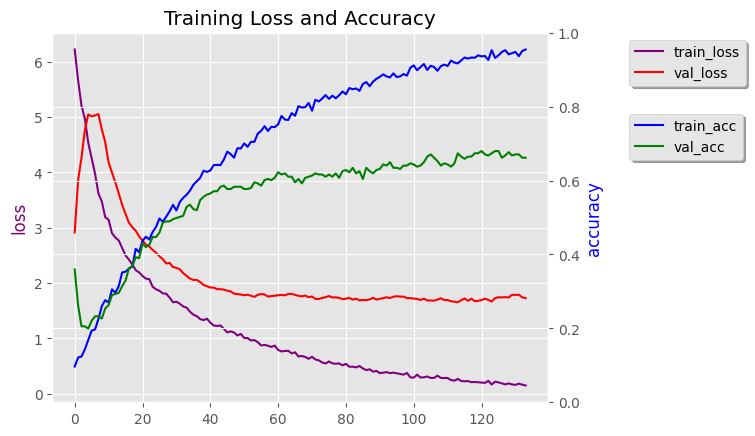

In [ ]:
# visualizar la curva de aprendizaje
visualize_learning_curve(history_fine_cnn)

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(model_fine_tuning_cnn, X_test_norm, y_test_ohe)

[INFO]: Evaluando el modelo de predicción...
18/18 [==============================] - 3s 38ms/step
              precision    recall  f1-score   support

           0       0.64      0.69      0.67        13
           1       0.36      0.33      0.35        12
           2       0.25      1.00      0.40         1
           3       0.50      0.42      0.45        12
           4       0.80      1.00      0.89         8
           5       0.68      0.89      0.77        19
           6       0.00      0.00      0.00         5
           7       0.62      0.56      0.59         9
           8       0.00      0.00      0.00         2
           9       0.45      0.38      0.42        13
          10       0.80      0.67      0.73        18
          11       0.60      0.60      0.60        15
          12       0.86      0.63      0.73        19
          13       0.71      0.83      0.77        12
          14       0.50      0.78      0.61         9
          15       0.88      0.58   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Predicir el modelo
y_pred = model_fine_tuning_cnn.predict(X_test_norm)

# Calcular la precisión (accuracy)
accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test_ohe, axis=1))
print("Precisión (Accuracy): {:.2%}".format(accuracy))

18/18 [==============================] - 1s 31ms/step
Precisión (Accuracy): 67.93%


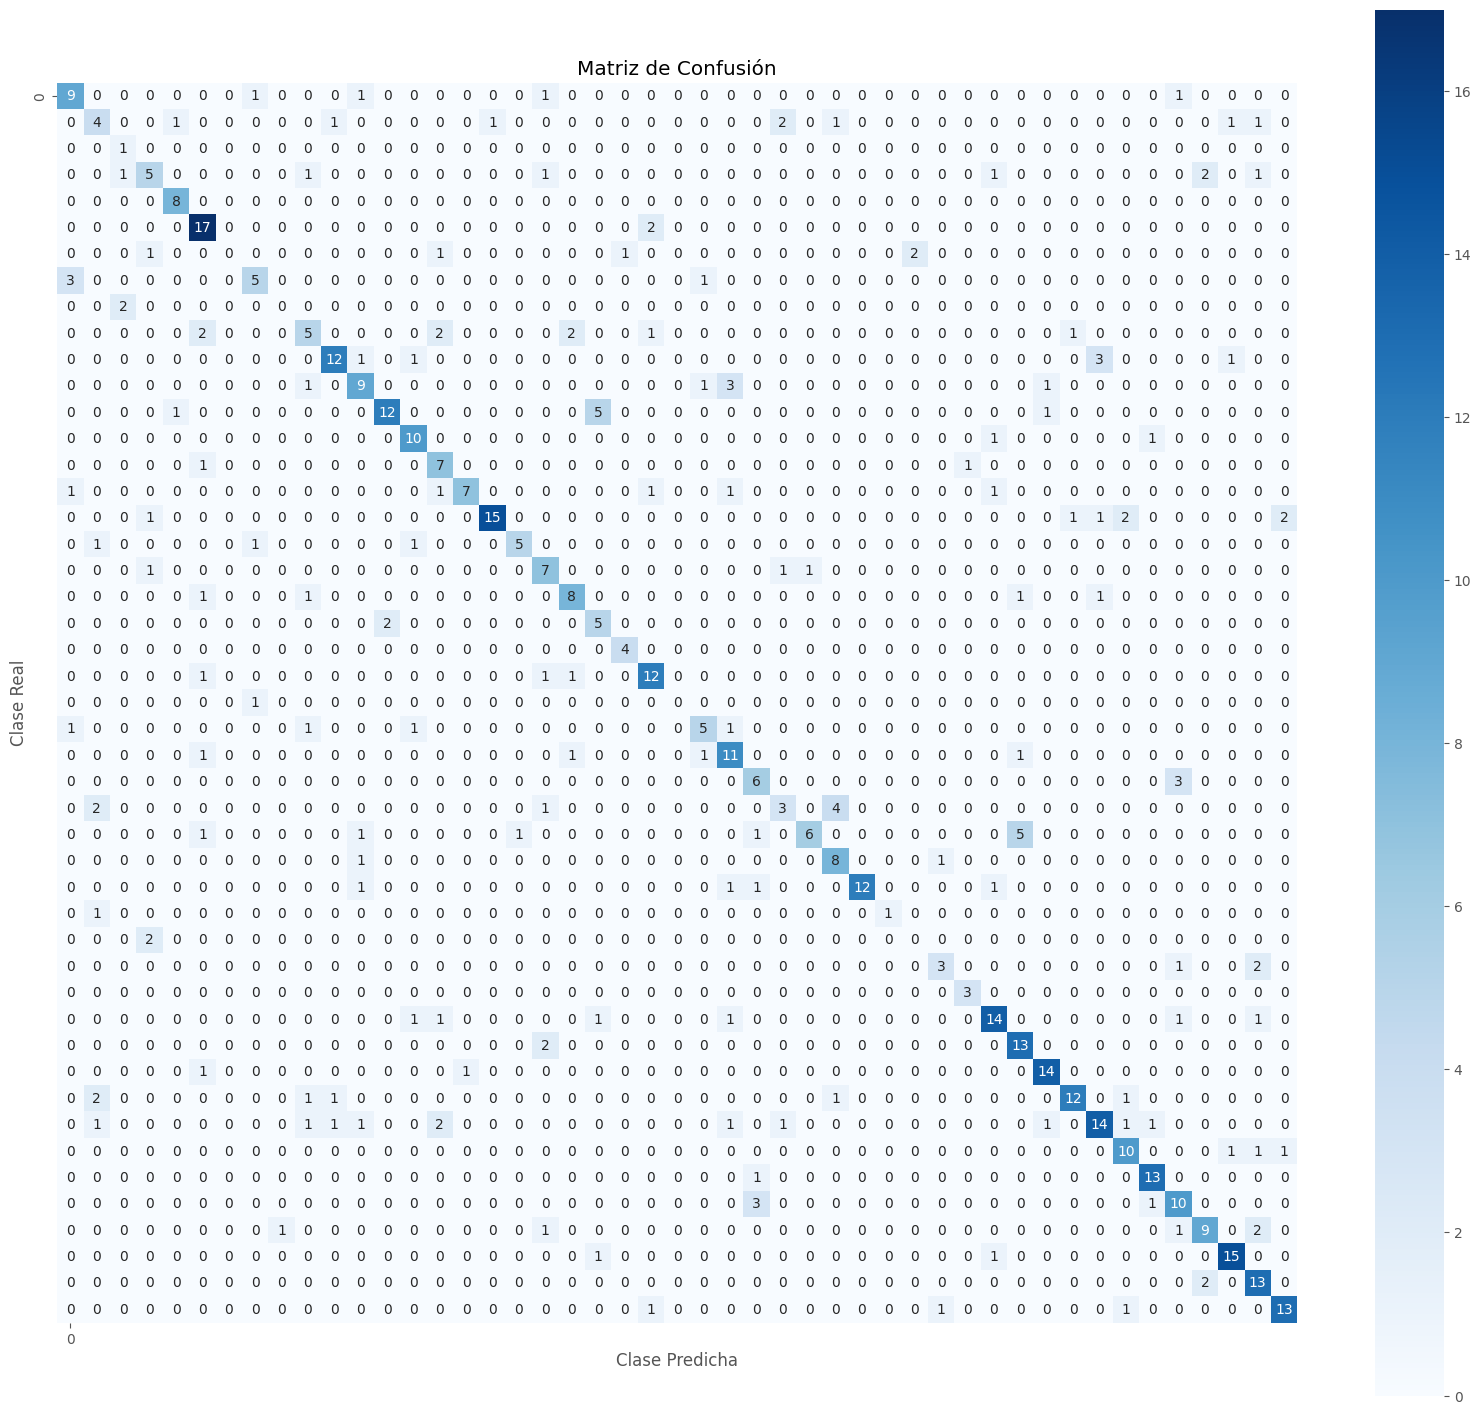

In [ ]:
# Obtener las clases reales y predichas
y_true_classes = np.argmax(y_test_ohe, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

plot_confusion_matrix(y_true_classes, y_pred_classes, num_clases)

## Fine Tuning Batch Layers CNN

In [ ]:
from keras import layers

# Una forma rapida de poder mejorar el accuracy de la red es reentrenando las capas con Batch Normalization

base_model_batchnorm = pretrained_model
model_batchnorm = transfer_learning_cnn

def unfreeze_model(model):
    # We unfreeze the top X layers while leaving BatchNorm layers frozen
    for layer in model_batchnorm.layers[-100:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    optimizer = keras.optimizers.Adam(learning_rate=1e-5)
    model_batchnorm.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )

# pretrained_model
# ResNet152V2_model

unfreeze_model(model_batchnorm)

epochs = 10  # @param {type: "slider", min:4, max:10}
# Entrenamiento del modelo con datagen GELU
hist_fine_batch = model_batchnorm.fit(datagen_train.flow(X_train_tr, y_train_tr_ohe, batch_size=batch_size),
                  epochs=epochs,
                  steps_per_epoch=X_train_tr.shape[0] // batch_size,
                  validation_data=datagen_val.flow(X_train_val, y_train_val_ohe, batch_size=batch_size),
                  callbacks=[callback])

Epoch 1/10
58/58 [==============================] - 84s 196ms/step - loss: 0.2253 - accuracy: 0.9300 - val_loss: 1.6841 - val_accuracy: 0.6435
Epoch 2/10
58/58 [==============================] - 8s 141ms/step - loss: 0.2394 - accuracy: 0.9229 - val_loss: 1.7591 - val_accuracy: 0.6465
Epoch 3/10
58/58 [==============================] - 8s 142ms/step - loss: 0.2206 - accuracy: 0.9343 - val_loss: 1.7546 - val_accuracy: 0.6405
Epoch 4/10
58/58 [==============================] - 8s 141ms/step - loss: 0.2101 - accuracy: 0.9354 - val_loss: 1.6880 - val_accuracy: 0.6344
Epoch 5/10
58/58 [==============================] - 8s 140ms/step - loss: 0.1947 - accuracy: 0.9370 - val_loss: 1.7063 - val_accuracy: 0.6465
Epoch 6/10
58/58 [==============================] - 8s 144ms/step - loss: 0.2030 - accuracy: 0.9397 - val_loss: 1.6739 - val_accuracy: 0.6828
Epoch 7/10
58/58 [==============================] - 8s 138ms/step - loss: 0.2370 - accuracy: 0.9251 - val_loss: 1.6939 - val_accuracy: 0.6556
Epoch

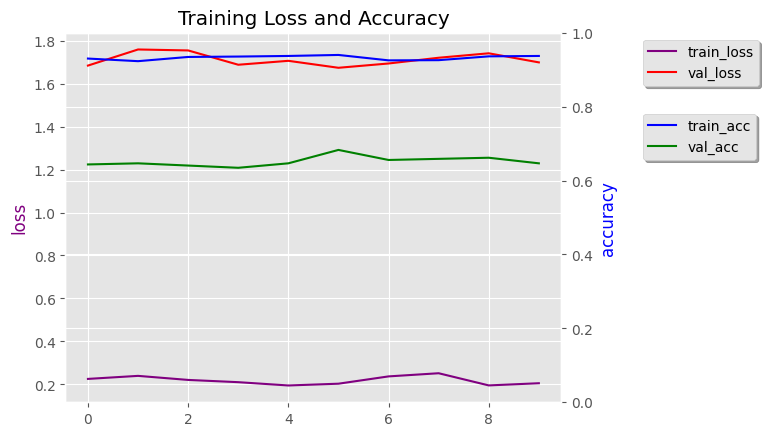

In [ ]:
# visualizar la curva de aprendizaje
visualize_learning_curve(hist_fine_batch)

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(model_batchnorm, X_test_norm, y_test_ohe)

[INFO]: Evaluando el modelo de predicción...
18/18 [==============================] - 3s 37ms/step
              precision    recall  f1-score   support

           0       0.62      0.77      0.69        13
           1       0.33      0.33      0.33        12
           2       0.25      1.00      0.40         1
           3       0.45      0.42      0.43        12
           4       0.78      0.88      0.82         8
           5       0.75      0.95      0.84        19
           6       0.00      0.00      0.00         5
           7       0.80      0.44      0.57         9
           8       0.00      0.00      0.00         2
           9       0.55      0.46      0.50        13
          10       0.68      0.72      0.70        18
          11       0.53      0.60      0.56        15
          12       0.92      0.63      0.75        19
          13       0.71      0.83      0.77        12
          14       0.53      0.89      0.67         9
          15       0.89      0.67   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Predicir el modelo
y_pred = model_batchnorm.predict(X_test_norm)

# Calcular la precisión (accuracy)
accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test_ohe, axis=1))
print("Precisión (Accuracy): {:.2%}".format(accuracy))

18/18 [==============================] - 1s 30ms/step
Precisión (Accuracy): 68.48%


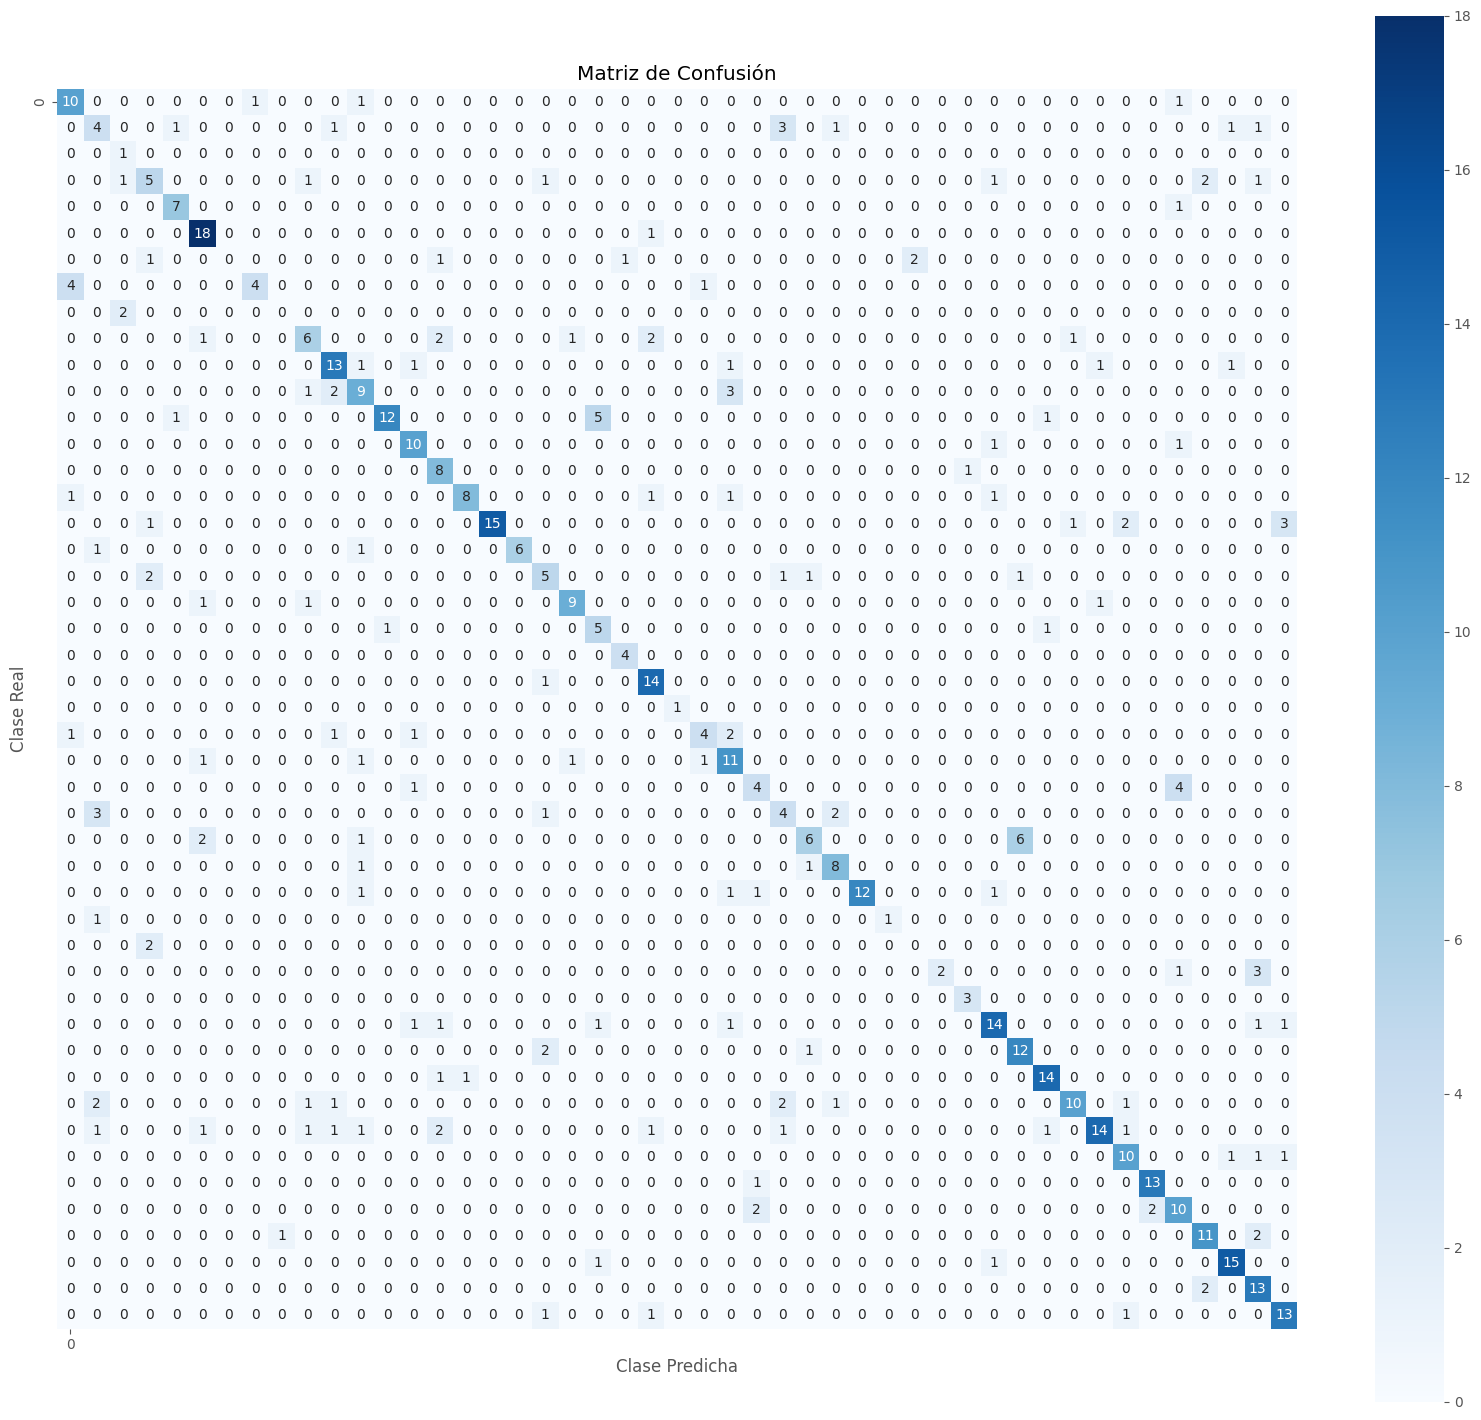

In [ ]:
# Obtener las clases reales y predichas
y_true_classes = np.argmax(y_test_ohe, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

plot_confusion_matrix(y_true_classes, y_pred_classes, num_clases)

## Transfer Learning v2, aumentando tamaño de imagenes a 224x224

In [ ]:
# Definición de hiperparámetros
batch_size = 64
learning_rate = 0.001
epochs = 300
num_clases = len(carpetas)
metrica_loss = "categorical_crossentropy"

# Modelo
ResNet152V2_model = keras.Sequential()

# Usaremos ResNet152V2
pretrained_model_v2 = keras.applications.ResNet152V2( # ConvNeXtXLarge 39.49%, ConvNeXtTiny 32%, ResNet152V2 65%, MobileNetV3Large 10%
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling='max',
    #classes=1000,
    classifier_activation="softmax",
)

# Freeze pretrained ResNet152V2 model
pretrained_model_v2.trainable = False

# Callbacks
callback = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

# Data augmentation
datagen_train = ImageDataGenerator(rotation_range=15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=False)

datagen_val = ImageDataGenerator()

# Agregamos modelo pre entrenado al Top Model
ResNet152V2_model.add(pretrained_model_v2)
ResNet152V2_model.add(Flatten())
ResNet152V2_model.add(Dense(512, activation='gelu'))
ResNet152V2_model.add(Dropout(0.3))
ResNet152V2_model.add(Dense(256, activation='gelu'))
ResNet152V2_model.add(Dropout(0.3))
ResNet152V2_model.add(Dense(128, activation='gelu'))
ResNet152V2_model.add(Dropout(0.3))
ResNet152V2_model.add(Dense(64, activation='gelu'))
ResNet152V2_model.add(Dense(num_clases, activation='softmax'))


ResNet152V2_model.summary()
# Compilación del modelo
ResNet152V2_model.compile(optimizer=Adam(learning_rate=learning_rate),loss=metrica_loss,metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 2048)              58331648  
                                                                 
 module_wrapper_1 (ModuleWr  (None, 2048)              0         
 apper)                                                          
                                                                 
 dense_5 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                      

In [ ]:
# Entrenamiento del modelo ResNet152V2_model
H_ResNet152V2_model = ResNet152V2_model.fit(datagen_train.flow(X_train_tr, y_train_tr_ohe, batch_size=batch_size),
                  epochs=epochs,
                  steps_per_epoch=X_train_tr.shape[0] // batch_size,
                  validation_data=datagen_val.flow(X_train_val, y_train_val_ohe, batch_size=batch_size),
                  callbacks=[callback])

Epoch 1/300
29/29 [==============================] - 41s 860ms/step - loss: 5.0918 - accuracy: 0.0260 - val_loss: 3.8255 - val_accuracy: 0.0272
Epoch 2/300
29/29 [==============================] - 22s 751ms/step - loss: 3.9081 - accuracy: 0.0282 - val_loss: 3.8188 - val_accuracy: 0.0363
Epoch 3/300
29/29 [==============================] - 22s 739ms/step - loss: 3.8635 - accuracy: 0.0298 - val_loss: 3.7719 - val_accuracy: 0.0604
Epoch 4/300
29/29 [==============================] - 22s 761ms/step - loss: 3.7893 - accuracy: 0.0381 - val_loss: 3.7036 - val_accuracy: 0.0483
Epoch 5/300
29/29 [==============================] - 23s 767ms/step - loss: 3.7395 - accuracy: 0.0530 - val_loss: 3.6382 - val_accuracy: 0.0332
Epoch 6/300
29/29 [==============================] - 22s 750ms/step - loss: 3.6721 - accuracy: 0.0486 - val_loss: 3.5946 - val_accuracy: 0.0634
Epoch 7/300
29/29 [==============================] - 22s 750ms/step - loss: 3.6108 - accuracy: 0.0674 - val_loss: 3.4873 - val_accuracy:

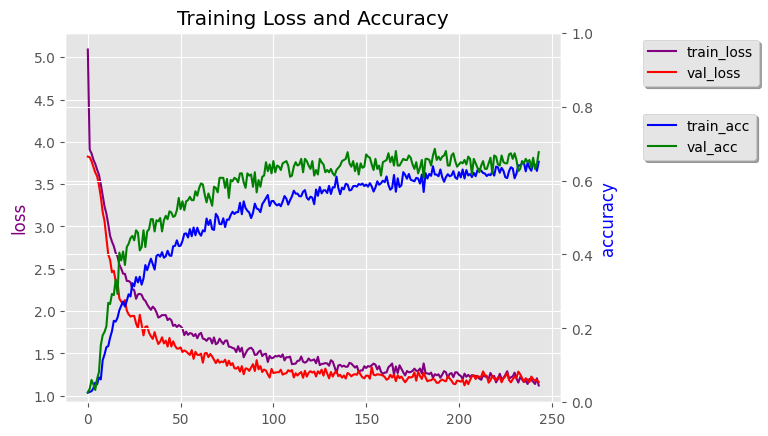

In [ ]:
# visualizar la curva de aprendizaje
visualize_learning_curve(H_ResNet152V2_model)

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(ResNet152V2_model, X_test_norm, y_test_ohe)

[INFO]: Evaluando el modelo de predicción...
9/9 [==============================] - 9s 862ms/step
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        13
           1       0.58      0.58      0.58        12
           2       0.00      0.00      0.00         1
           3       0.30      0.25      0.27        12
           4       0.60      0.75      0.67         8
           5       0.78      0.95      0.86        19
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         2
           9       0.69      0.85      0.76        13
          10       0.65      0.94      0.77        18
          11       0.81      0.87      0.84        15
          12       1.00      0.63      0.77        19
          13       0.58      0.92      0.71        12
          14       0.73      0.89      0.80         9
          15       0.67      0.83    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Predicir el modelo
y_pred = ResNet152V2_model.predict(X_test_norm)

# Calcular la precisión (accuracy)
accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test_ohe, axis=1))
print("Precisión (Accuracy): {:.2%}".format(accuracy))

18/18 [==============================] - 8s 304ms/step
Precisión (Accuracy): 70.29%


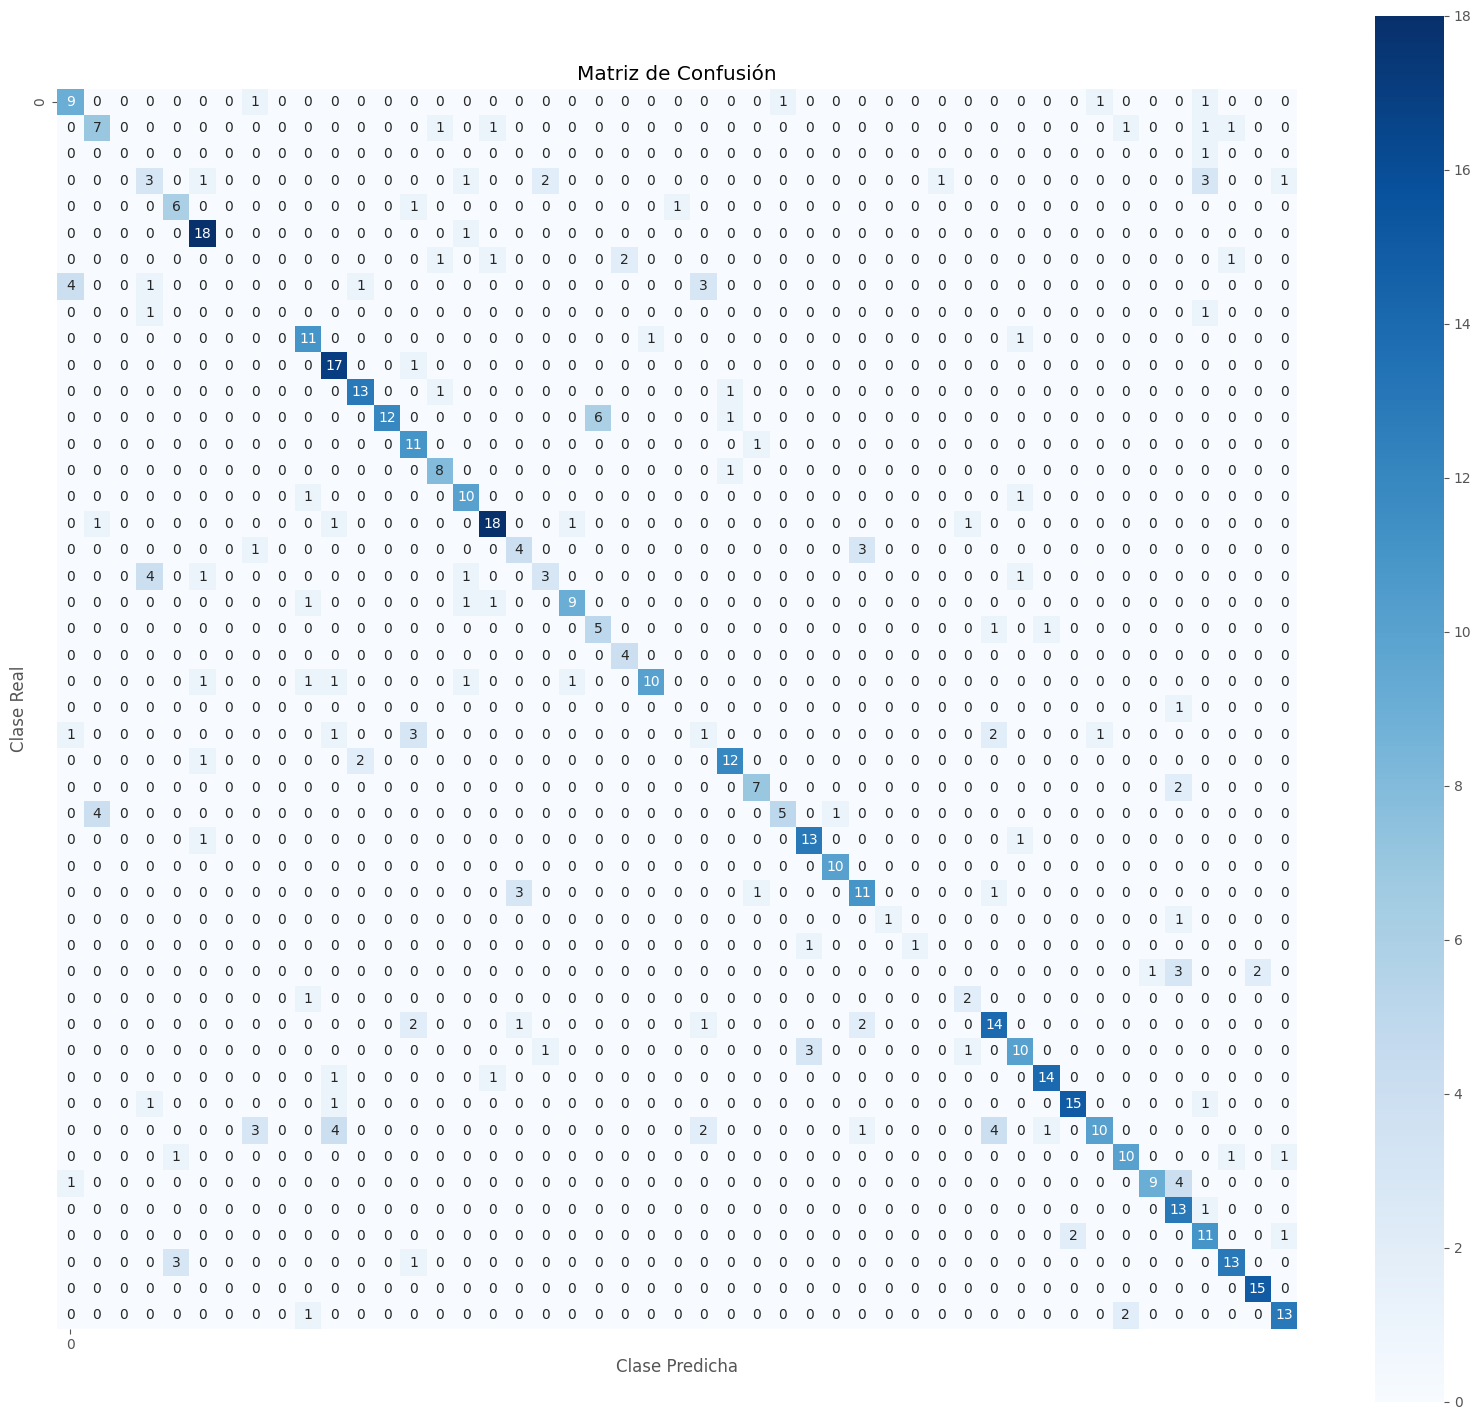

In [ ]:
# Obtener las clases reales y predichas
y_true_classes = np.argmax(y_test_ohe, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

plot_confusion_matrix(y_true_classes, y_pred_classes, num_clases)

## Fine Tuning

In [ ]:
# Copiamos el modelo y dejamos la copia como entrenable
model_fine_tuning = ResNet152V2_model
model_fine_tuning.trainable = True

In [ ]:
# Vemos cuantas capas existen en el base model
print("Number of layers in the base model: ", len(model_fine_tuning.layers))

# Fine-tune desde la capa definida a continuacion
fine_tune_at = 0

# Freeze a las capas antes de `fine_tune_at`, si es cero, hacemos tuning sobre todas las capas
for layer in model_fine_tuning.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  10


In [ ]:
# Compilación del modelo
model_fine_tuning.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss="categorical_crossentropy", metrics=["accuracy"]
    )

model_fine_tuning.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 2048)              58331648  
                                                                 
 module_wrapper_1 (ModuleWr  (None, 2048)              0         
 apper)                                                          
                                                                 
 dense_5 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                      

In [ ]:
# Entrenamiento de las capas del modelo pre entrenado
history_fine = model_fine_tuning.fit(datagen_train.flow(X_train_tr, y_train_tr_ohe, batch_size=batch_size),
                  epochs=epochs,
                  steps_per_epoch=X_train_tr.shape[0] // batch_size,
                  validation_data=datagen_val.flow(X_train_val, y_train_val_ohe, batch_size=batch_size),
                  callbacks=[callback])

Epoch 1/300
29/29 [==============================] - 137s 2s/step - loss: 2.2394 - accuracy: 0.4243 - val_loss: 1.1556 - val_accuracy: 0.6405
Epoch 2/300
29/29 [==============================] - 48s 2s/step - loss: 2.0562 - accuracy: 0.4591 - val_loss: 1.1410 - val_accuracy: 0.6616
Epoch 3/300
29/29 [==============================] - 48s 2s/step - loss: 1.7634 - accuracy: 0.5083 - val_loss: 1.1438 - val_accuracy: 0.6556
Epoch 4/300
29/29 [==============================] - 48s 2s/step - loss: 1.6121 - accuracy: 0.5331 - val_loss: 1.1306 - val_accuracy: 0.6707
Epoch 5/300
29/29 [==============================] - 48s 2s/step - loss: 1.5713 - accuracy: 0.5481 - val_loss: 1.1072 - val_accuracy: 0.6767
Epoch 6/300
29/29 [==============================] - 48s 2s/step - loss: 1.4817 - accuracy: 0.5630 - val_loss: 1.1175 - val_accuracy: 0.6677
Epoch 7/300
29/29 [==============================] - 48s 2s/step - loss: 1.4132 - accuracy: 0.5840 - val_loss: 1.1300 - val_accuracy: 0.6767
Epoch 8/300


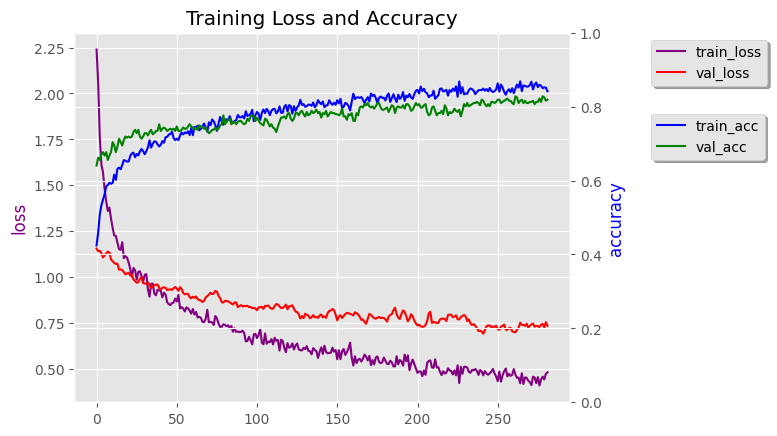

In [ ]:
# visualizar la curva de aprendizaje
visualize_learning_curve(history_fine)

In [ ]:
n# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(model_fine_tuning, X_test_norm, y_test_ohe)

[INFO]: Evaluando el modelo de predicción...
9/9 [==============================] - 6s 440ms/step
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.73      0.67      0.70        12
           2       0.00      0.00      0.00         1
           3       0.62      0.67      0.64        12
           4       0.89      1.00      0.94         8
           5       0.73      1.00      0.84        19
           6       0.00      0.00      0.00         5
           7       0.83      0.56      0.67         9
           8       0.00      0.00      0.00         2
           9       0.85      0.85      0.85        13
          10       0.80      0.89      0.84        18
          11       0.93      0.87      0.90        15
          12       0.87      0.68      0.76        19
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         9
          15       1.00      0.67    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# Predicir el modelo
y_pred = model_fine_tuning.predict(X_test_norm)

# Calcular la precisión (accuracy)
accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test_ohe, axis=1))
print("Precisión (Accuracy): {:.2%}".format(accuracy))

18/18 [==============================] - 4s 244ms/step
Precisión (Accuracy): 83.88%


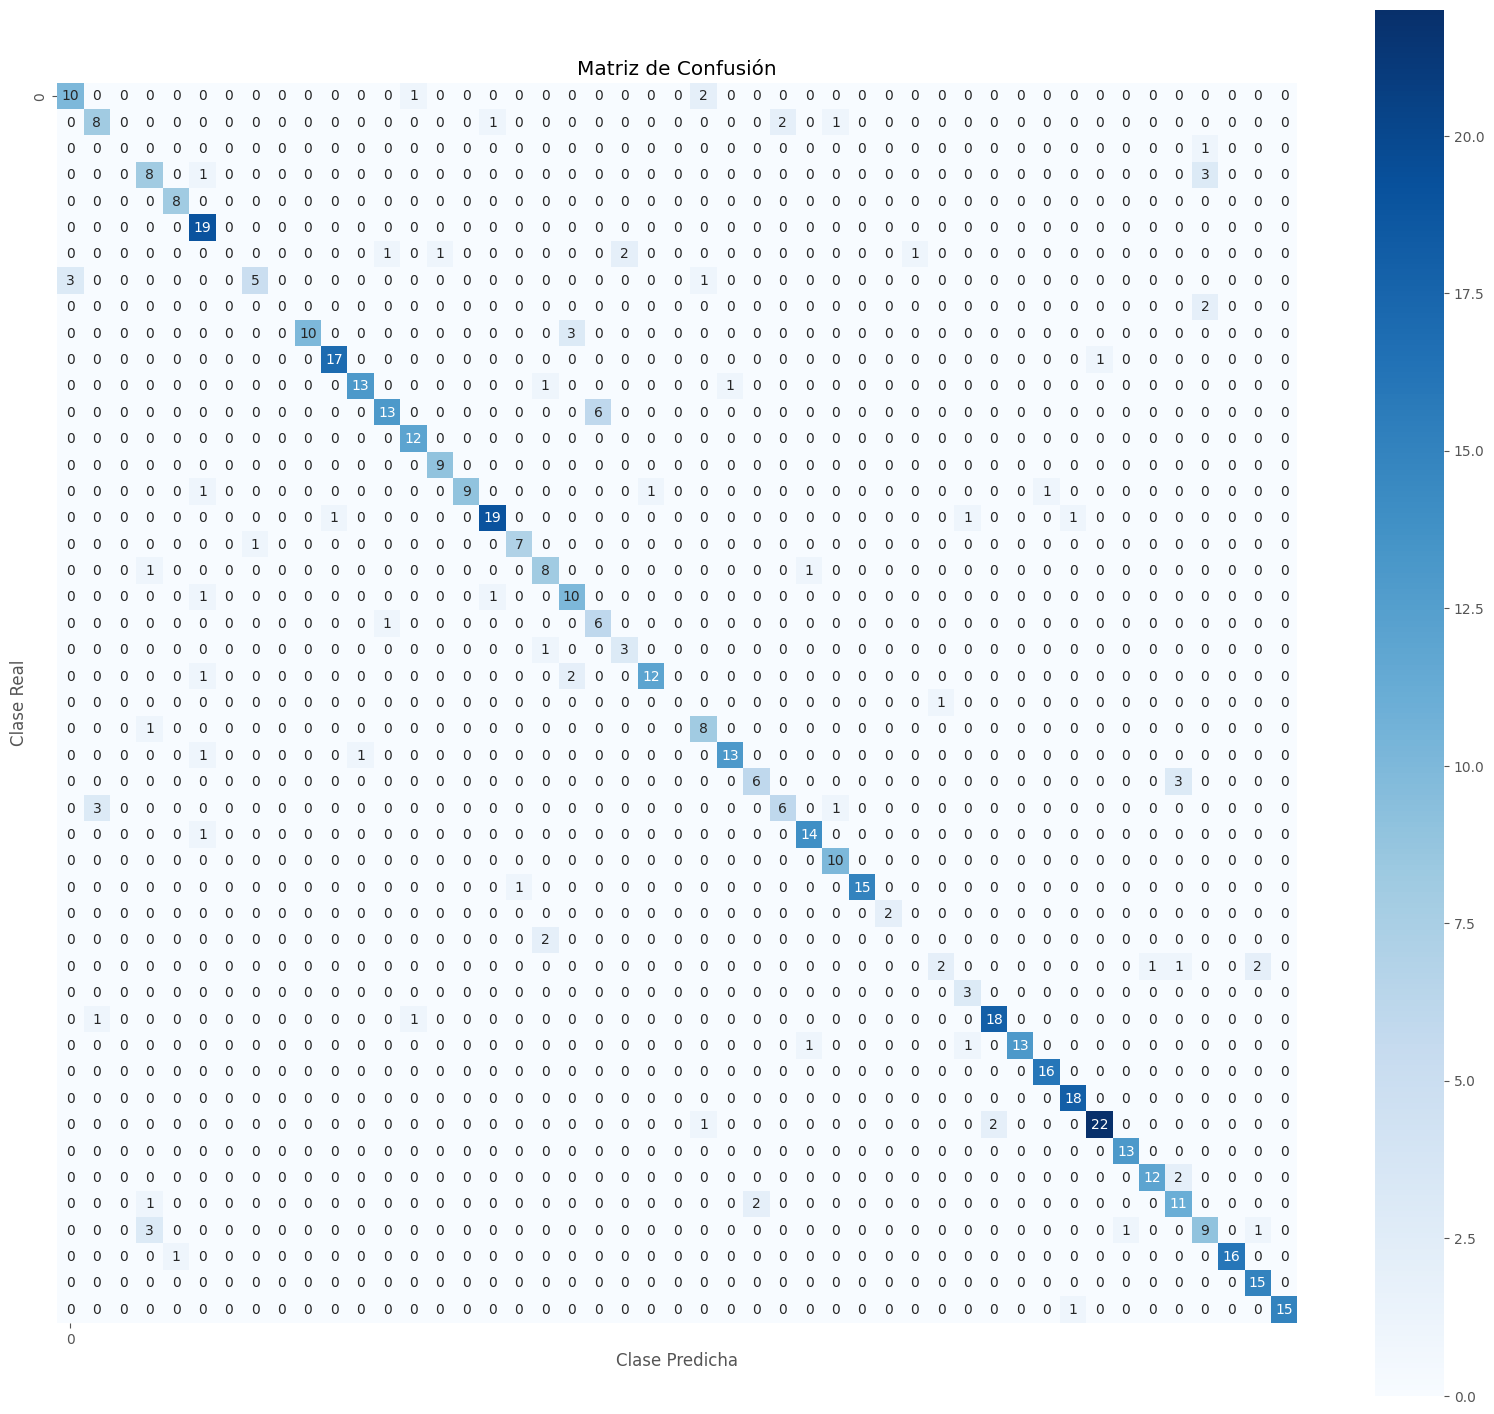

In [42]:
# Obtener las clases reales y predichas
y_true_classes = np.argmax(y_test_ohe, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

plot_confusion_matrix(y_true_classes, y_pred_classes, num_clases)

In [ ]:
#!pip install numba

#from numba import cuda
#device = cuda.get_current_device()
#device.reset()

## Fine Tuning Batch Layers

In [ ]:
from keras import layers

# Una forma rapida de poder mejorar el accuracy de la red es reentrenando las capas con Batch Normalization

base_model_batchnorm = pretrained_model_v2
model_batchnorm = ResNet152V2_model

def unfreeze_model(model):
    # We unfreeze the top X layers while leaving BatchNorm layers frozen
    for layer in model_batchnorm.layers[-100:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    optimizer = keras.optimizers.Adam(learning_rate=1e-5)
    model_batchnorm.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )

# pretrained_model_v2
# ResNet152V2_model

unfreeze_model(model_batchnorm)

epochs = 10  # @param {type: "slider", min:4, max:10}
# Entrenamiento del modelo con datagen GELU
hist_fine_batch = model_batchnorm.fit(datagen_train.flow(X_train_tr, y_train_tr_ohe, batch_size=batch_size),
                  epochs=epochs,
                  steps_per_epoch=X_train_tr.shape[0] // batch_size,
                  validation_data=datagen_val.flow(X_train_val, y_train_val_ohe, batch_size=batch_size),
                  callbacks=[callback])

Epoch 1/10
29/29 [==============================] - 127s 2s/step - loss: 0.5062 - accuracy: 0.8343 - val_loss: 0.7107 - val_accuracy: 0.8097
Epoch 2/10
29/29 [==============================] - 47s 2s/step - loss: 0.4530 - accuracy: 0.8497 - val_loss: 0.7175 - val_accuracy: 0.8097
Epoch 3/10
29/29 [==============================] - 48s 2s/step - loss: 0.4729 - accuracy: 0.8492 - val_loss: 0.7012 - val_accuracy: 0.8036
Epoch 4/10
29/29 [==============================] - 48s 2s/step - loss: 0.4793 - accuracy: 0.8436 - val_loss: 0.7125 - val_accuracy: 0.8036
Epoch 5/10
29/29 [==============================] - 48s 2s/step - loss: 0.5171 - accuracy: 0.8414 - val_loss: 0.7033 - val_accuracy: 0.8097
Epoch 6/10
29/29 [==============================] - 48s 2s/step - loss: 0.4488 - accuracy: 0.8492 - val_loss: 0.7152 - val_accuracy: 0.8248
Epoch 7/10
29/29 [==============================] - 48s 2s/step - loss: 0.5237 - accuracy: 0.8359 - val_loss: 0.7513 - val_accuracy: 0.7976
Epoch 8/10
 8/29 [=

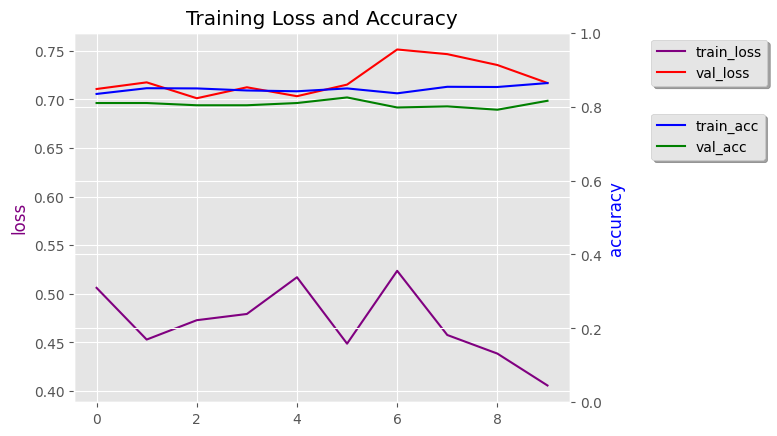

In [40]:
# visualizar la curva de aprendizaje
visualize_learning_curve(hist_fine_batch)

In [43]:
# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(model_batchnorm, X_test_norm, y_test_ohe)

9/9 [==============================] - 4s 469ms/step
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.67      0.67      0.67        12
           2       0.00      0.00      0.00         1
           3       0.57      0.67      0.62        12
           4       0.89      1.00      0.94         8
           5       0.76      1.00      0.86        19
           6       0.00      0.00      0.00         5
           7       0.83      0.56      0.67         9
           8       0.00      0.00      0.00         2
           9       1.00      0.77      0.87        13
          10       0.94      0.94      0.94        18
          11       0.93      0.87      0.90        15
          12       0.87      0.68      0.76        19
          13       0.86      1.00      0.92        12
          14       0.90      1.00      0.95         9
          15       1.00      0.75      0.86        12
          16       0.90     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
# Predicir el modelo
y_pred = model_batchnorm.predict(X_test_norm)

# Calcular la precisión (accuracy)
accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test_ohe, axis=1))
print("Precisión (Accuracy): {:.2%}".format(accuracy))

18/18 [==============================] - 4s 241ms/step
Precisión (Accuracy): 83.88%


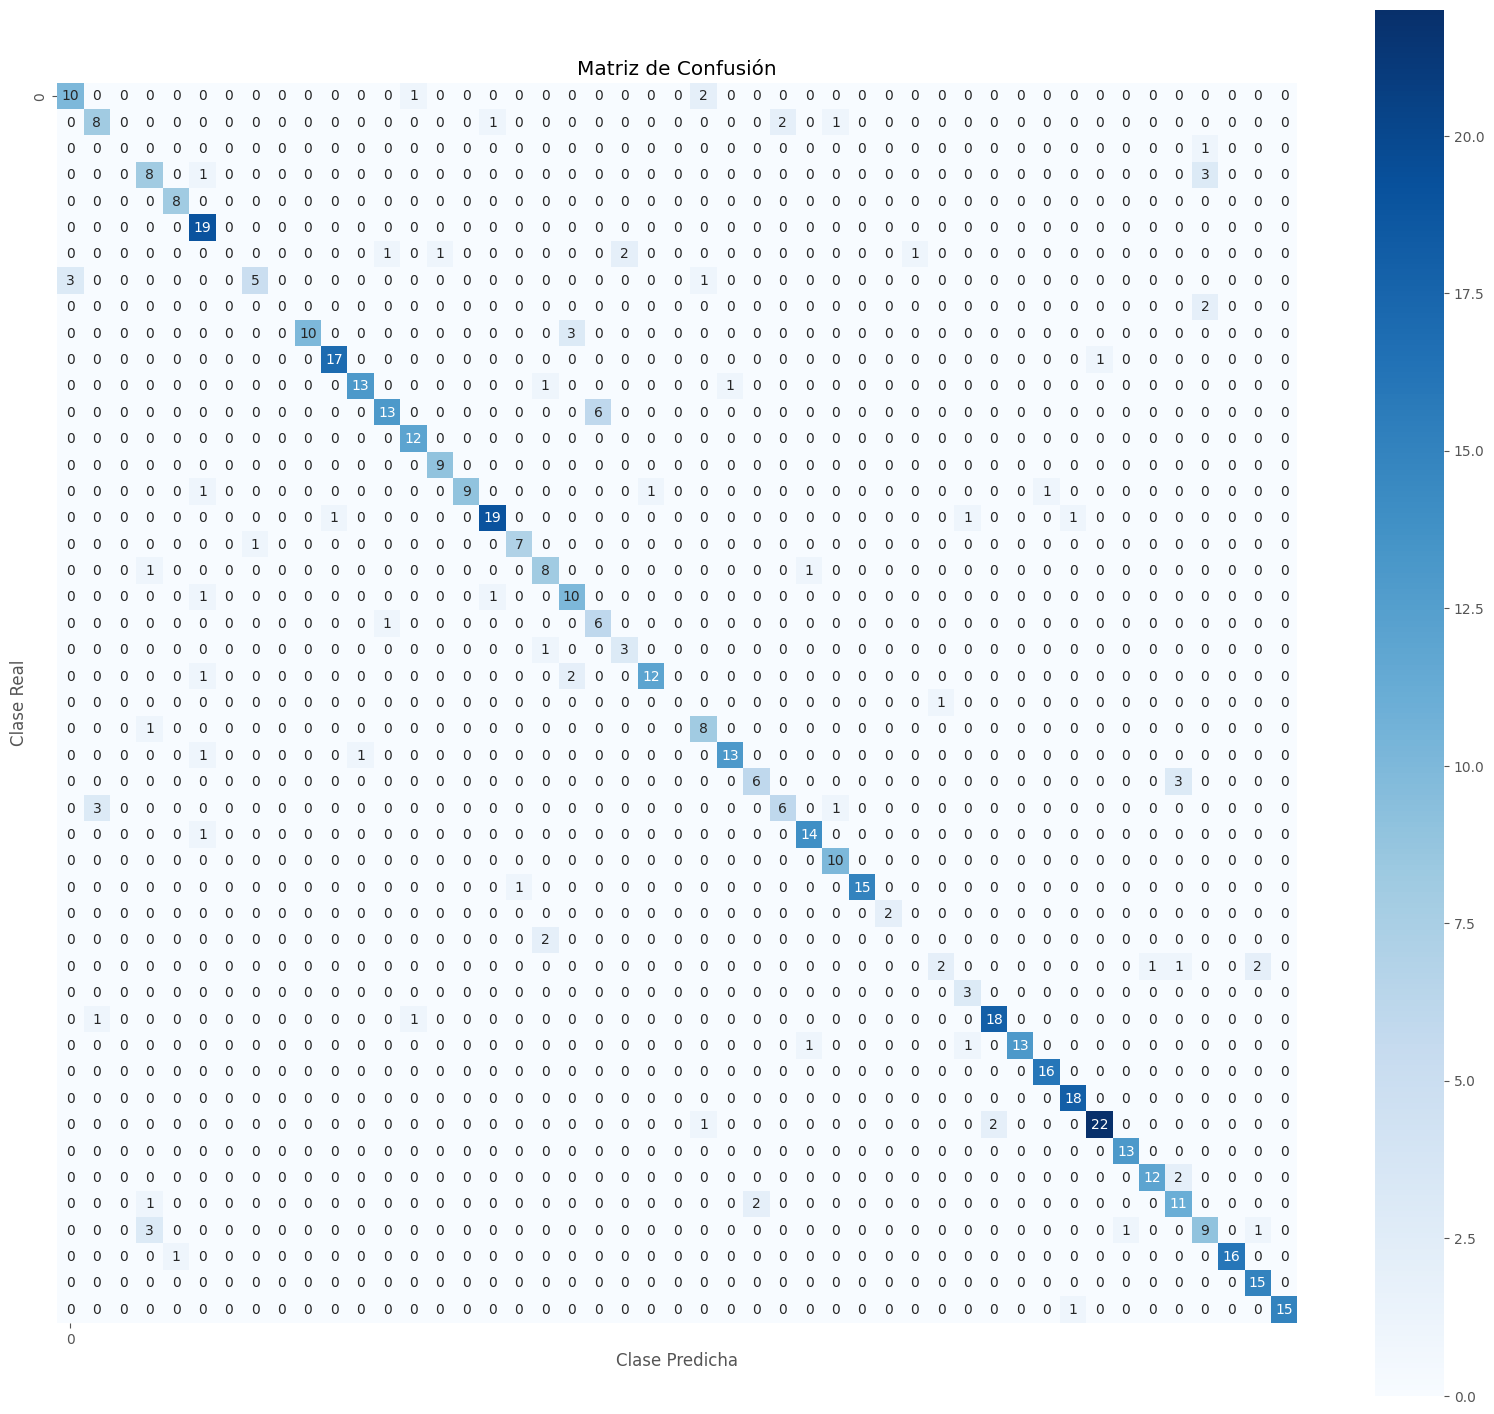

In [45]:
# Obtener las clases reales y predichas
y_true_classes = np.argmax(y_test_ohe, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

plot_confusion_matrix(y_true_classes, y_pred_classes, num_clases)

### 5. Evaluación de los modelos

#### 5.1 comparaciones entre métricas de evaluación de ambas estrategias.

| Model                     | Precision | Recall | F1-score |
|----------------------------|-----------|--------|----------|
| CNN                       |   0.70    |  0.67  |   0.68   |
| ResNet Transfer Learning  |   0.70    |  0.70  |   0.69   |
| ResNet Fine Tuning        |   0.83    |  0.84  |   0.83   |
| ResNet Fine Tuning Batch  |   0.84    |  0.84  |   0.83   |




#### 5.2 Técnicas de regularización para mejorar el rendimiento de los modelos


| Hiperparámetros  | Tipo de Red                 | batch_size | learning_rate | epochs | Resultado                  |
|------------------|-----------------------------|------------|---------------|--------|----------------------------|
| Hiperparámetros 1| Entrenar desde cero         |     64     |     0.001     |  300   | Precisión menor al 40%.    |
| Hiperparámetros 2| Entrenar desde cero         |    128     |     0.001     |  300   | Precisión menor al 40%.    |
| Hiperparámetros 3| Entrenar desde cero         |     64     |     0.01      |  300   | Precisión menor al 40%.    |
| Hiperparámetros 4| Entrenar desde cero         |     32     |    0.0001     |  200   | Precisión no proporcionada.|



### 6 Conclusiones

**Red entrenada desde cero**
* La segunda arquitectura de la segunda red tiene una estructura más profunda y data augmentation agresivo, superó en rendimiento a la primera red. Se destacan la importancia de ajustar hiperparámetros y la arquitectura del modelo para optimizar su rendimiento en tareas de aprendizaje automático.
* La modificación en las técnicas de data augmentation fue crucial; el aumento en su agresividad mejoró significativamente la generalización del modelo, mejorando la presición del modelo.

**Red pre-entrenada**

* Además de los hiperparámetros de los modelos, es importante entender con qué estamos trabajando. Por ejemplo las imágenes de Yoga con cierto **nivel de resolución como 224x224 tuvieron mejores resultados en Transfer Learning y Fine Tuning que bajándola a niveles como 60x60**, inevitablemente se pierde información bajando la resolución.

* Naturalmente la estrategia **From Scratch obtuvo un Accuracy más bajo que un modelo con Transfer Learning y/o Fine Tuning**, esto es debido a que los modelos pre-entrenados como ResNet y sus derivados, fueron entrenados con arquitecturas mucho más complejas y con una cantidad de datos enormemente superior.

*   Por otro lado, fue interesante descubrir que **existen técnicas de Fine Tuning bastante rápidas que pueden significar mejoras inmediatas** en nuestros modelos con Transfer Learning. Tomar las **capas con BatchNormalization** es uno de sus ejemplos.

